
# Analysis Data PFT Pilots

## Load data participants

In [63]:
data_exp1 = pd.read_csv('/Users/pradyumna/Documents/GiTs/PFT_fMRI_2019/Pilots/Data/All/PFT_Choice_Pilot_All.csv') 
data_exp_ratings_2 = pd.read_csv('/Users/pradyumna/Documents/GiTs/PFT_fMRI_2019/Pilots/Data/All/PFT_idRatingsFrame_Pilot_All.csv') 

In [64]:
# Insert to exclude particitipants
excludedPart = []
for i in excludedPart:
    data_exp1 = data_exp1[(data_exp1.Part != i)]
print (data_exp1["Part"].unique())
print ('Number of participants: ' + str(len(data_exp1["Part"].unique())))

[0 1 2 3 4 5 6]
Number of participants: 7


In [65]:
data_exp1.head()

trial  leftId  rightId  Frame   endTime  choice  choiceTime  LRat1  RRat1  \
0    0.0    21.0      4.0    2.0  7.508409     1.0    1.174838   50.0   28.5   
1    1.0    12.0     14.0    2.0  7.513930     1.0    0.780269   40.5   27.5   
2    2.0    20.0     19.0    2.0  7.515296     1.0    1.195317   50.0    8.0   
3    3.0     2.0      8.0    2.0  7.514498     1.0    0.247736   44.5   10.5   
4    4.0     4.0     21.0    1.0  7.514311     1.0    0.178482   28.5   50.0   

   LRat2  RRat2     LVar1     RVar1     LVar2      RVar2  Part  
0    1.5   20.5  0.000000  3.535534  0.707107   6.363961     0  
1   10.0   23.0  0.707107  2.121320  5.656854   4.242641     0  
2    1.0   41.0  0.000000  0.000000  0.000000  12.727922     0  
3    1.0   50.0  3.535534  3.535534  0.000000   0.000000     0  
4   20.5    1.5  3.535534  0.000000  6.363961   0.707107     0

In [66]:
data_exp_ratings_2.head()

nameId  rat1  rat2       var1       var2  Part
0    20.0  50.0   1.0   0.000000   0.000000     0
1    10.0  29.5  27.0   6.363961  12.727922     0
2     8.0  10.5  50.0   3.535534   0.000000     0
3    18.0  50.0   1.0   0.000000   0.000000     0
4     6.0  25.5   3.0  34.648232   2.828427     0

In [67]:
data_exp1=data_exp1.rename(index=str, columns={"choiceTime":"RT", })

## drop NaNs from choice rows

In [68]:
data_exp1 = data_exp1.dropna(axis = 0, how ='any') 
data_exp_ratings_2 = data_exp_ratings_2.dropna(axis = 0, how ='any') 

In [69]:
data_exp1 = data_exp1.reset_index()
data_exp_ratings_2 = data_exp_ratings_2.reset_index()

## add extra value information

In [70]:
data_exp1["TotVal1"] = data_exp1['RRat1']+ data_exp1['LRat1']
data_exp1["TotVal2"] = data_exp1['RRat2']+ data_exp1['LRat2']


data_exp1["DVal1"] = data_exp1['RRat1'] - data_exp1['LRat1']
data_exp1["absDVal1"] = np.abs(data_exp1["DVal1"] )

data_exp1["DVar1"] = data_exp1['RVar1'] - data_exp1['LVar1']
data_exp1["absDVar1"] = np.abs(data_exp1["DVar1"] )

data_exp1["DVal2"] = data_exp1['RRat2'] - data_exp1['LRat2']
data_exp1["absDVal2"] = np.abs(data_exp1["DVal2"] )

data_exp1["DVar2"] = data_exp1['RVar2'] - data_exp1['LVar2']
data_exp1["absDVar2"] = np.abs(data_exp1["DVar2"] )

## add z-scores

In [71]:
data_exp1["zDVal1"] = z_score1(data_exp1,'Part',"DVal1")
data_exp1["zabsDVal1"] = z_score1(data_exp1,'Part',"absDVal1")

data_exp1["zDVal2"] = z_score1(data_exp1,'Part',"DVal2")
data_exp1["zabsDVal2"] = z_score1(data_exp1,'Part',"absDVal2")

data_exp1["zDVar1"] = z_score1(data_exp1,'Part',"DVar1")
data_exp1["zabsDVar1"] = z_score1(data_exp1,'Part',"absDVar1")

data_exp1["zDVar2"] = z_score1(data_exp1,'Part',"DVar2")
data_exp1["zabsDVar2"] = z_score1(data_exp1,'Part',"absDVar2")

data_exp1["zTotVal1"] = z_score1(data_exp1,'Part',"TotVal1")
data_exp1["zTotVal2"] = z_score1(data_exp1,'Part',"TotVal2")
data_exp1["zRT"] = z_score1(data_exp1,'Part',"RT")

In [72]:
Correct = []
for i in range(len(data_exp1)):
    if data_exp1.Frame[i] == 1:
        if (data_exp1.choice[i] == 1 and (data_exp1.LRat1[i] < data_exp1.RRat1[i])) or (data_exp1.choice[i] == -1 and (data_exp1.LRat1[i] > data_exp1.RRat1[i])):
            Correct.append(1)
        else:
            Correct.append(0)
    if data_exp1.Frame[i] == 2:
        if (data_exp1.choice[i] == 1 and (data_exp1.LRat1[i] > data_exp1.RRat1[i])) or (data_exp1.choice[i] == -1 and (data_exp1.LRat1[i] < data_exp1.RRat1[i])):
            Correct.append(1)
        else:
            Correct.append(0)

data_exp1["correct"] = Correct

## change choices from -1 to 0 for left

In [73]:
choices = []
for i in range(len(data_exp1)):
        if (data_exp1.choice[i] == 1):
            choices.append(1)
        else:
            choices.append(0)

data_exp1["choices"] = choices

# Ratings data analysis
----------------------------------------
## by rating I refer to the value assigned to each celebrity in like (FRAME 1) and dislile (FRAME 2)

## Data visualization

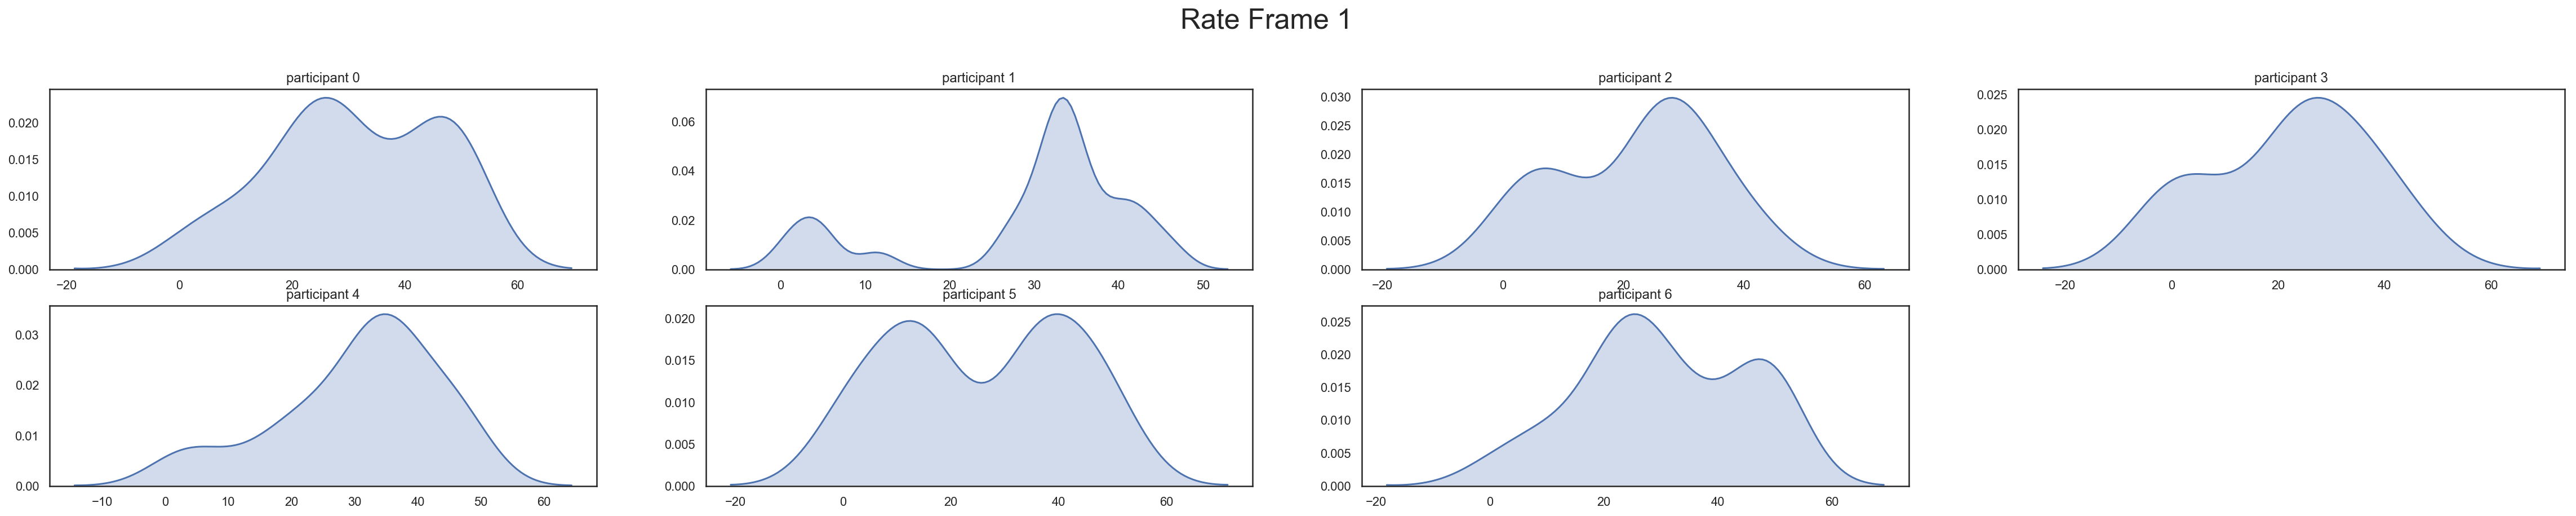

In [74]:
participant_densities(data_exp1,'RRat1', title = 'Rate Frame 1')

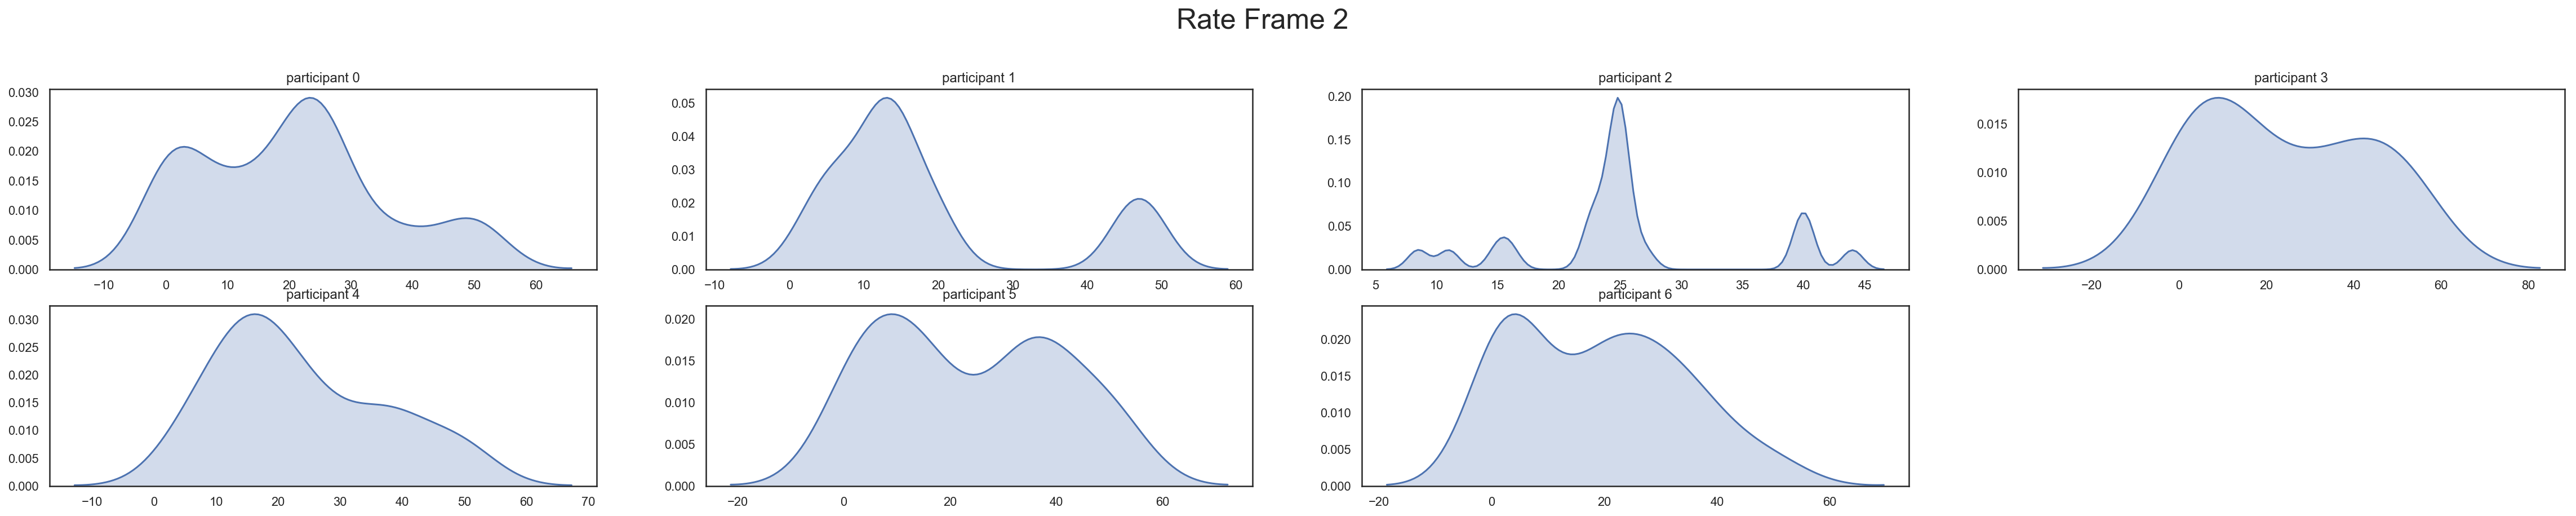

In [75]:
participant_densities(data_exp1,'RRat2', title = 'Rate Frame 2 ')

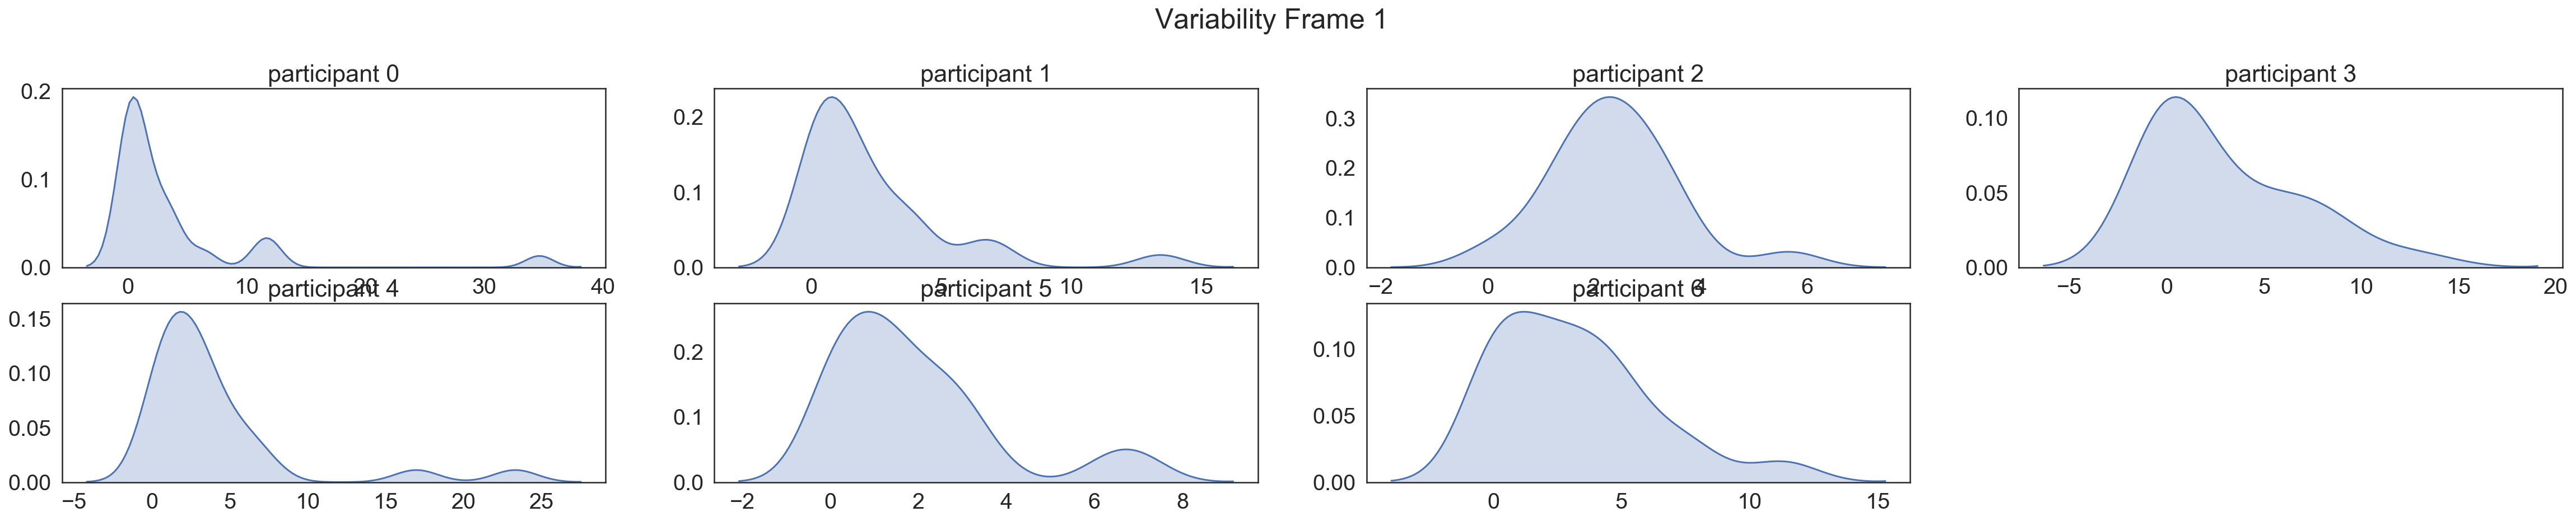

In [82]:
participant_densities(data_exp1,'RVar1', title = 'Variability Frame 1')

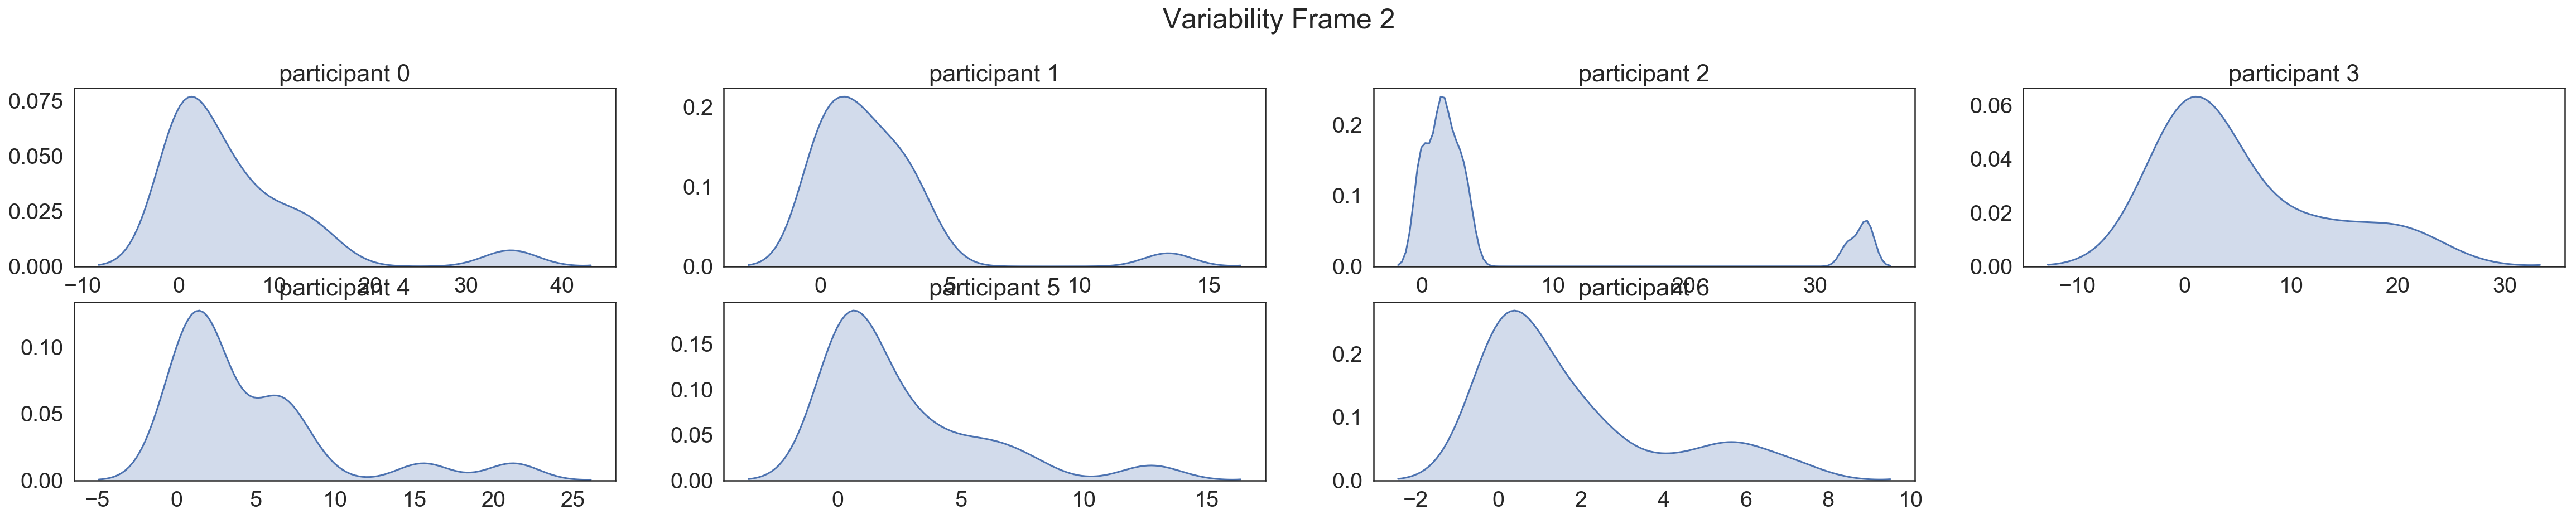

In [83]:
participant_densities(data_exp1,'RVar2', title = 'Variability Frame 2')

## items ratings in both frames

Pearson's r = -0.887 p =  0.0


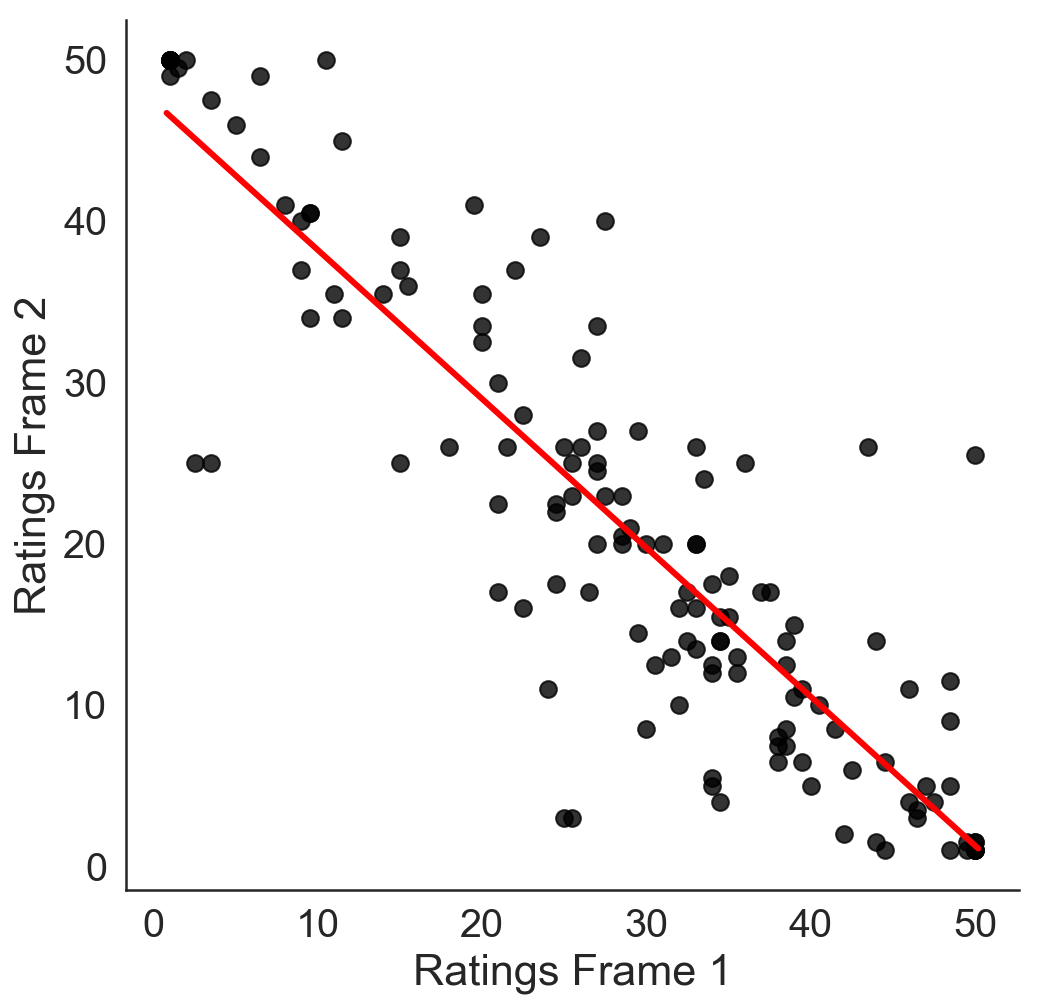

In [84]:
corrPlotSimple(data_exp_ratings_2, 'rat1','Ratings Frame 1','rat2','Ratings Frame 2')

Pearson's r = 0.102 p =  0.23


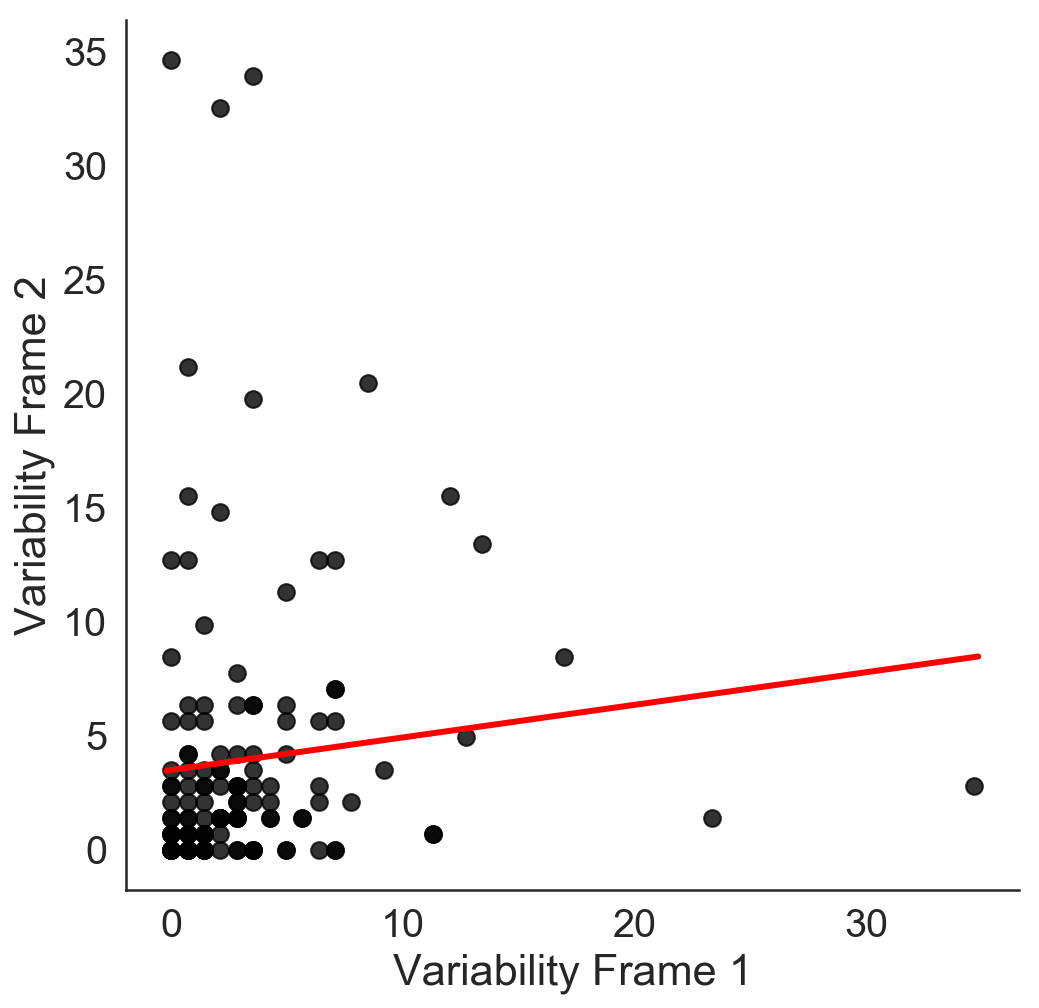

In [85]:
corrPlotSimple(data_exp_ratings_2, 'var1','Variability Frame 1','var2','Variability Frame 2')

## relationship between rating and variability. Notice that for rating, the range [0 - 50] the value 25 corresponds to indifference between like and dislike 

Pearson's r = 0.001 p =  0.989


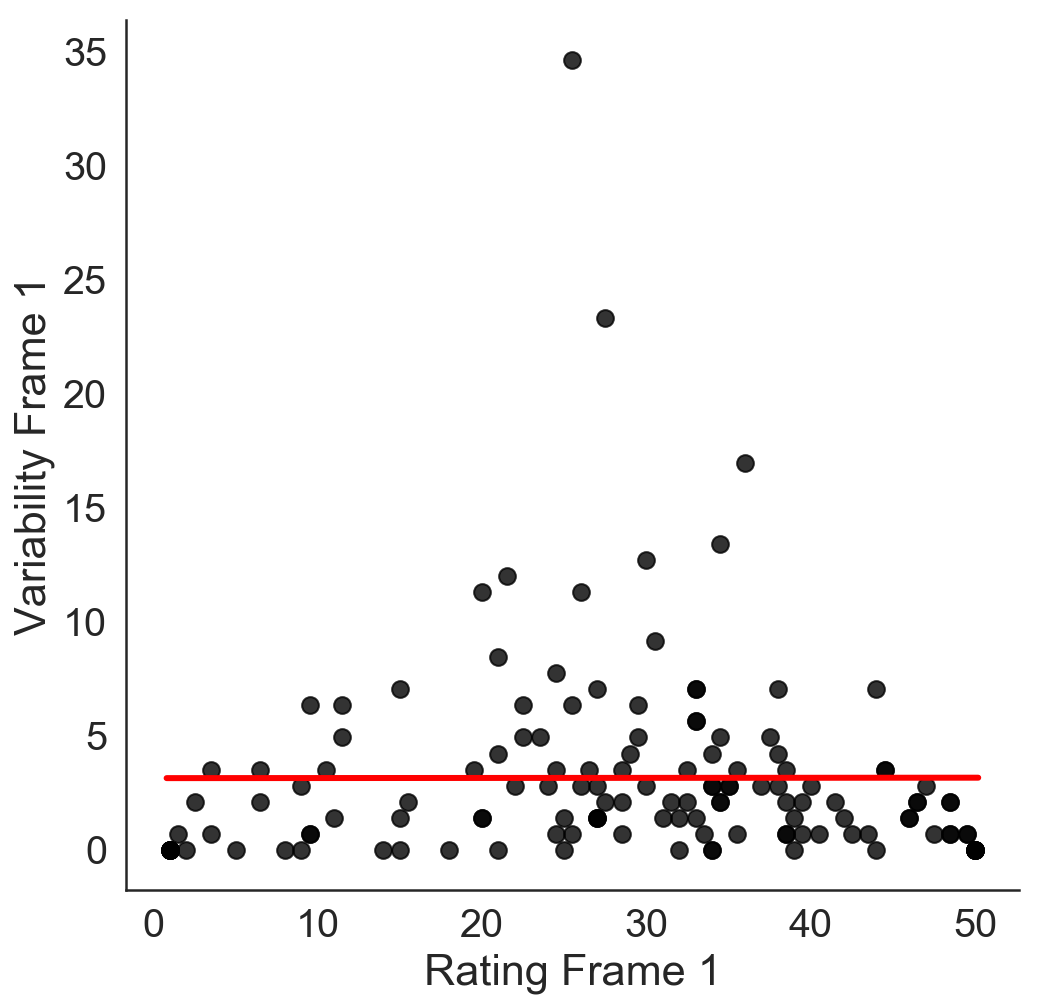

In [86]:
corrPlotSimple(data_exp_ratings_2, 'rat1','Rating Frame 1','var1','Variability Frame 1')

Pearson's r = 0.036 p =  0.669


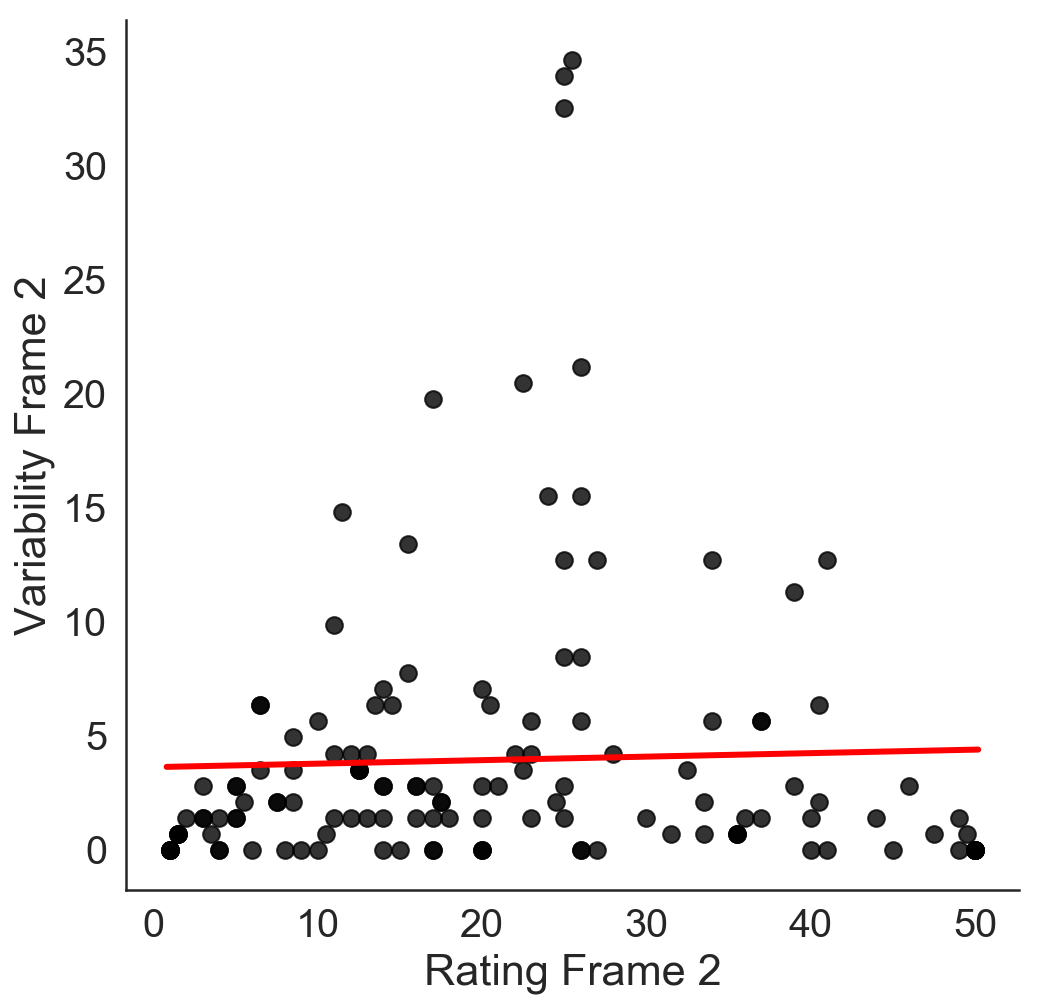

In [87]:
corrPlotSimple(data_exp_ratings_2, 'rat2','Rating Frame 2','var2','Variability Frame 2')

## I create an index of partiallity ( how much I like/dislike something, with 0 representing indifference and 25 representing absolute like/dislike for that celebrity)

In [88]:
# if we adapt the rating scale to leave value 25 at the center of the scale (0) we can characterize the level of indifference that the celebrity generates
data_exp_ratings_2['partiality1'] = np.abs(data_exp_ratings_2.rat1-25)
data_exp_ratings_2['partiality2'] = np.abs(data_exp_ratings_2.rat2-25)

Pearson's r = -0.391 p =  0.0
Pearson's r = -0.457 p =  0.0


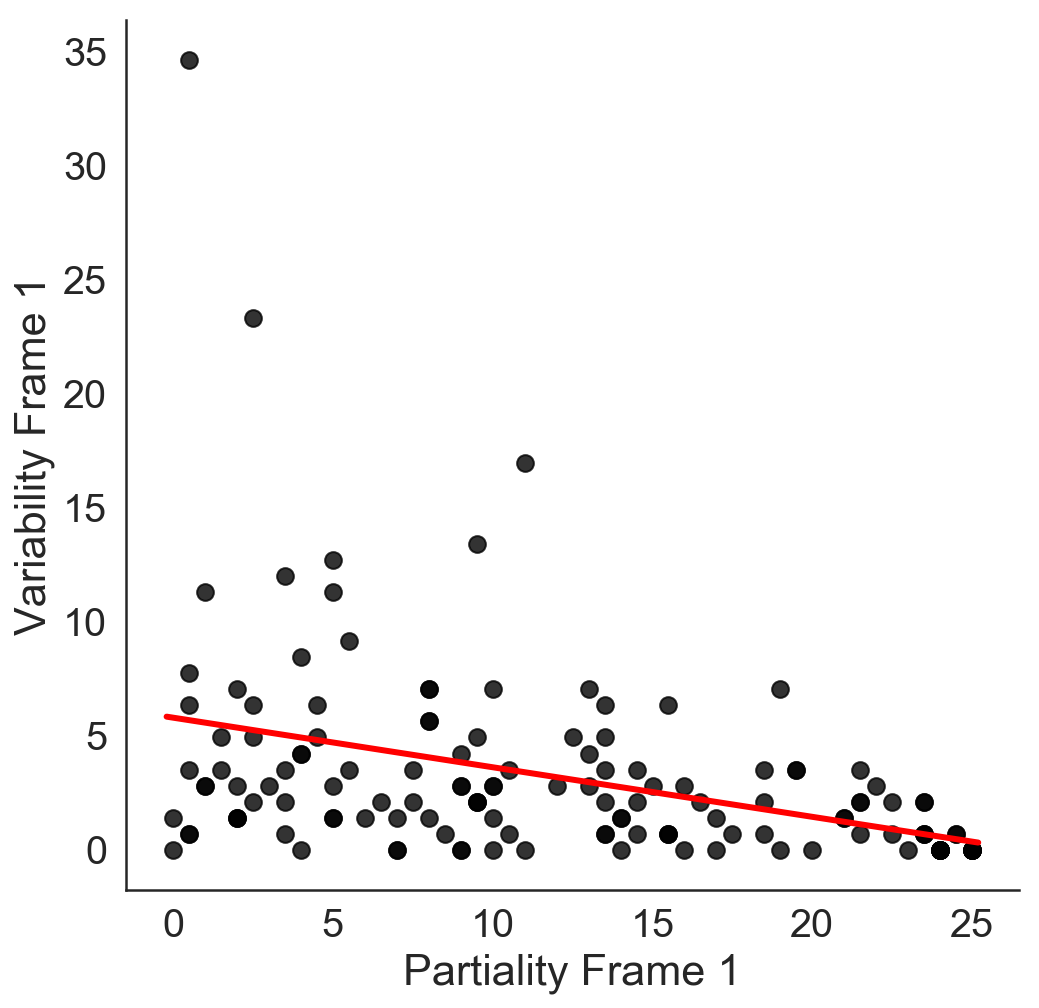

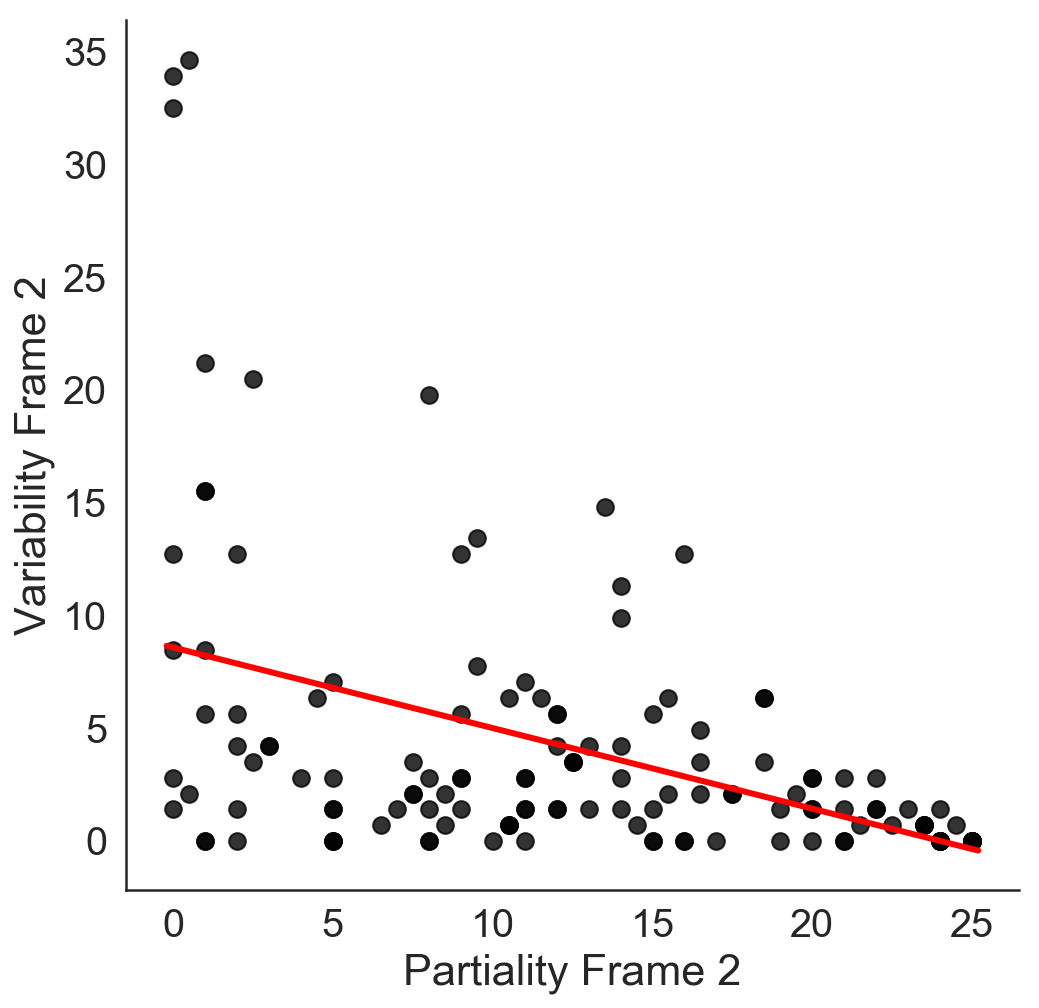

In [89]:
corrPlotSimple(data_exp_ratings_2, 'partiality1','Partiality Frame 1','var1','Variability Frame 1')
corrPlotSimple(data_exp_ratings_2, 'partiality2','Partiality Frame 2','var2','Variability Frame 2')

### Using the ratings given in like and dislike frame I found that variability in rating is higher in celebrities that that generate more indiffence in the participants.

## Example ratings for each celebrity in one participant

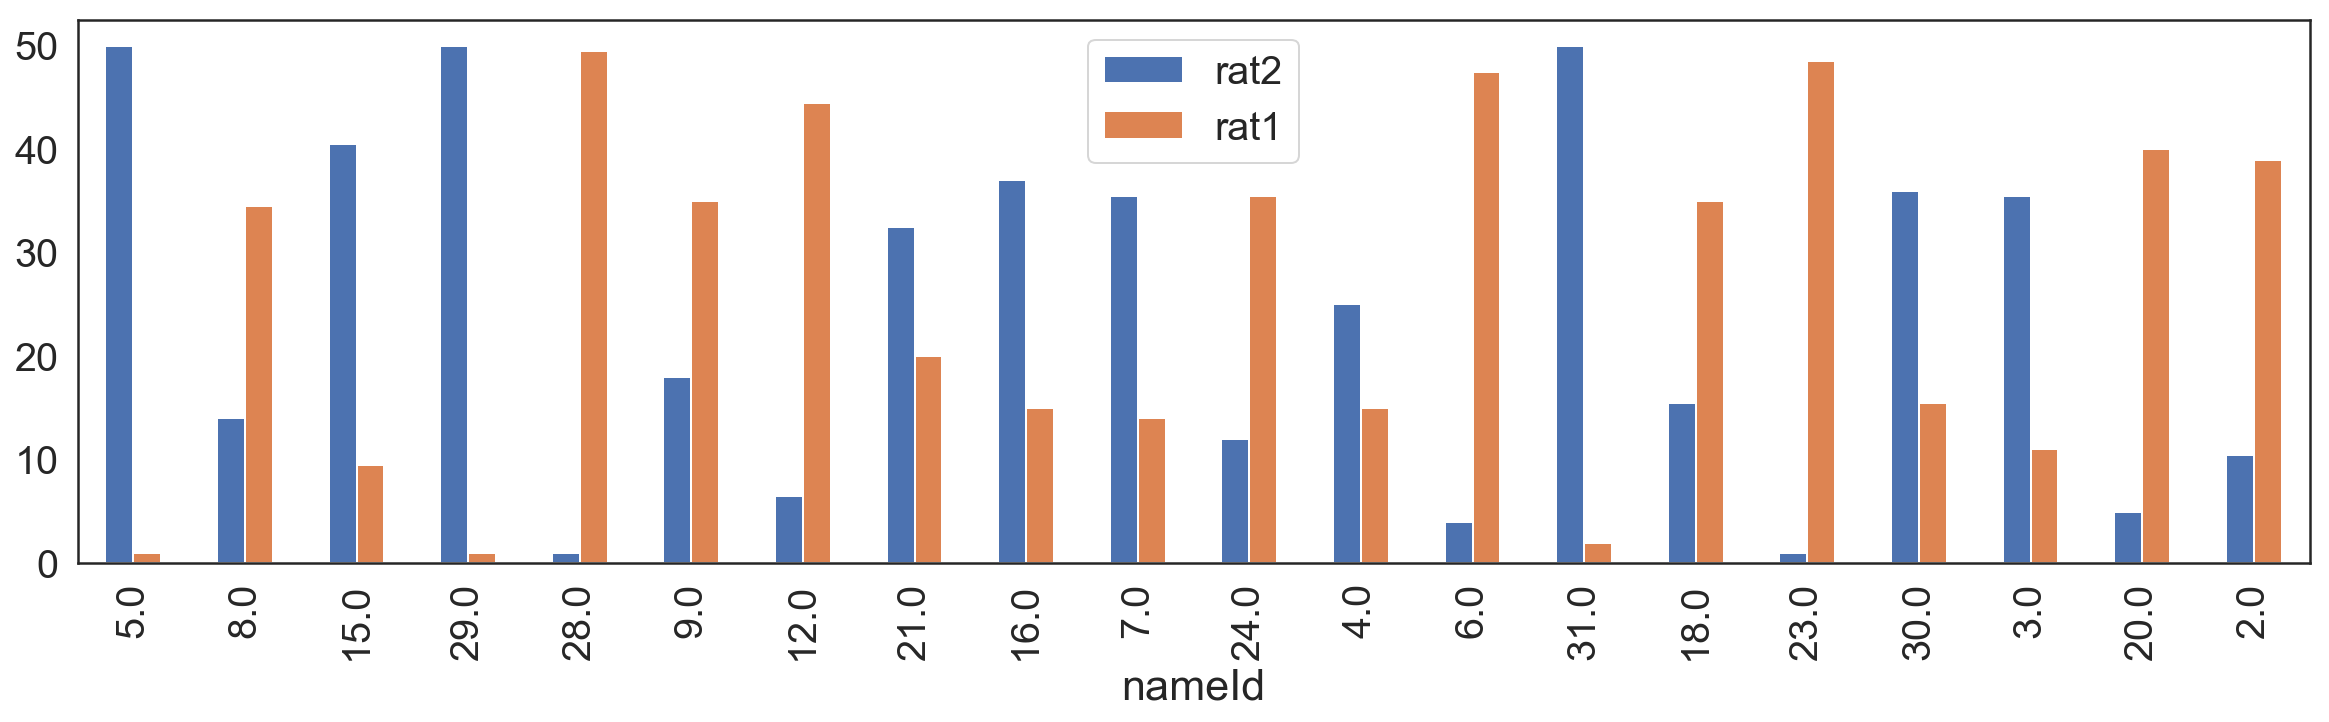

In [90]:
data_exp_ratings_2.loc[(data_exp_ratings_2['Part'] == 5)].plot.bar(x='nameId',y={'rat1','rat2'}, figsize=(20,5))

## Example ratings  for each celebrity for all participants

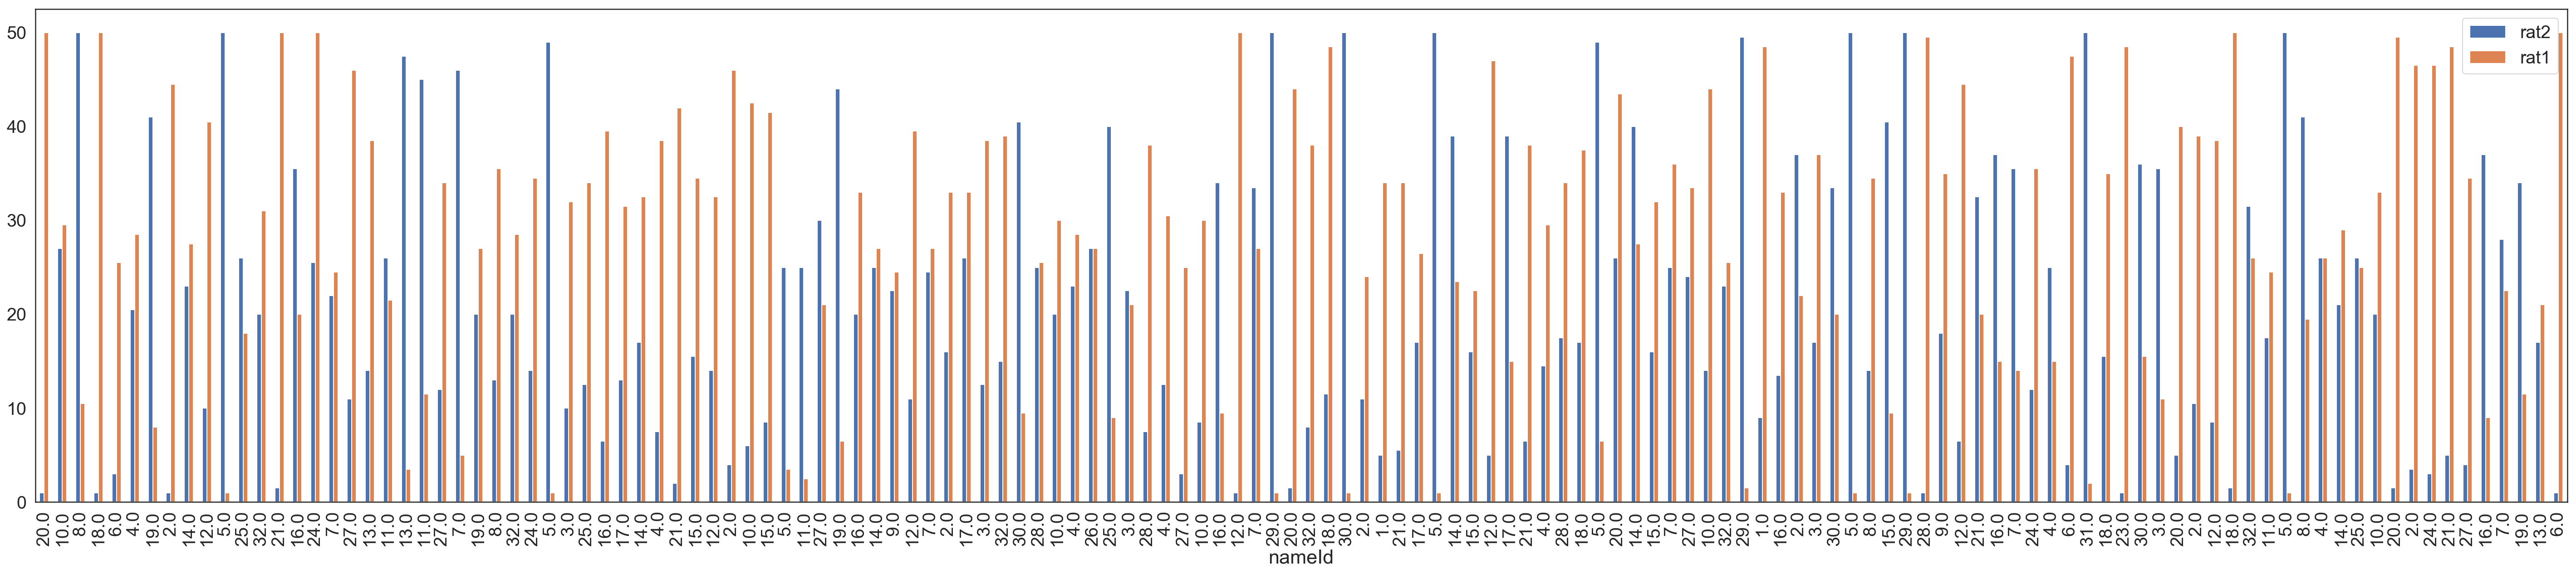

In [91]:
data_exp_ratings_2.plot.bar(x='nameId',y={'rat1','rat2'}, figsize=(50,10))

#  Choice data analysis
-----------------------------------------------------------------------

## Data visualization

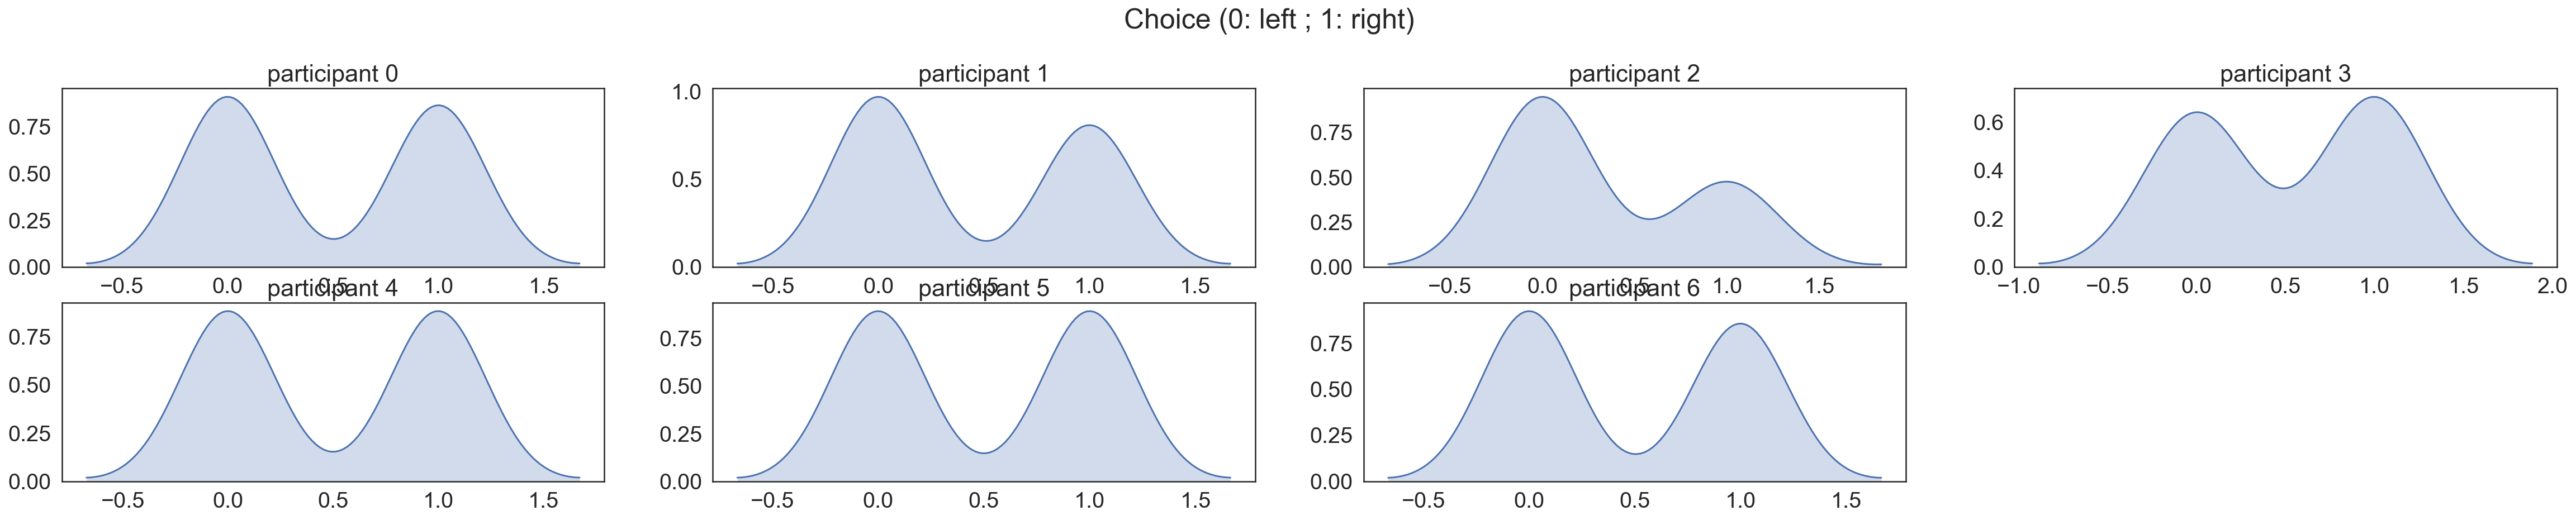

In [92]:
participant_densities(data_exp1,'choices', title = 'Choice (0: left ; 1: right)')

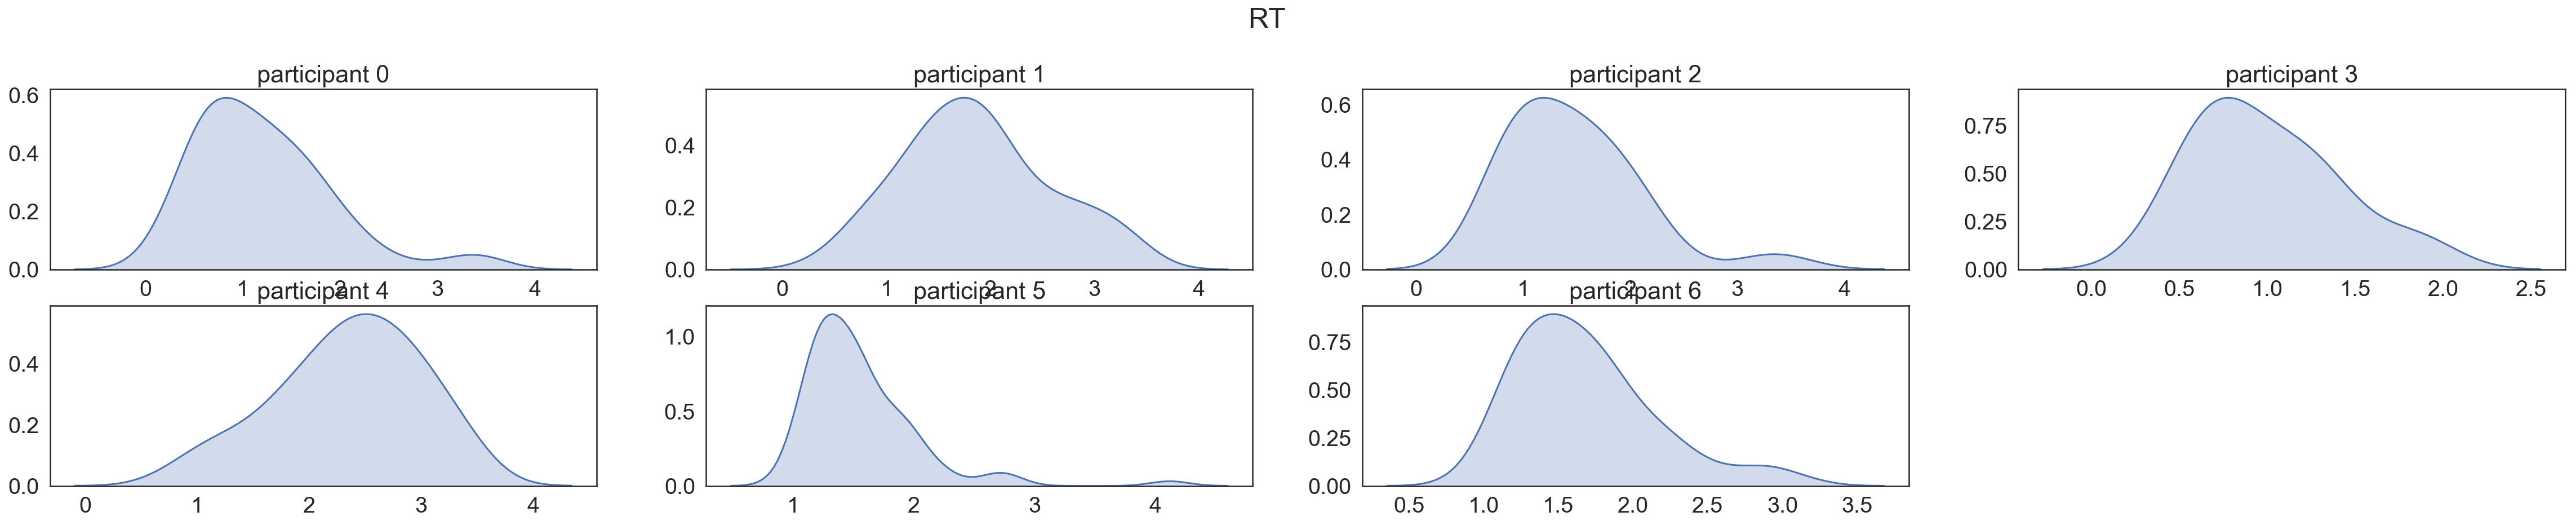

In [93]:
participant_densities(data_exp1,'RT',title = 'RT')

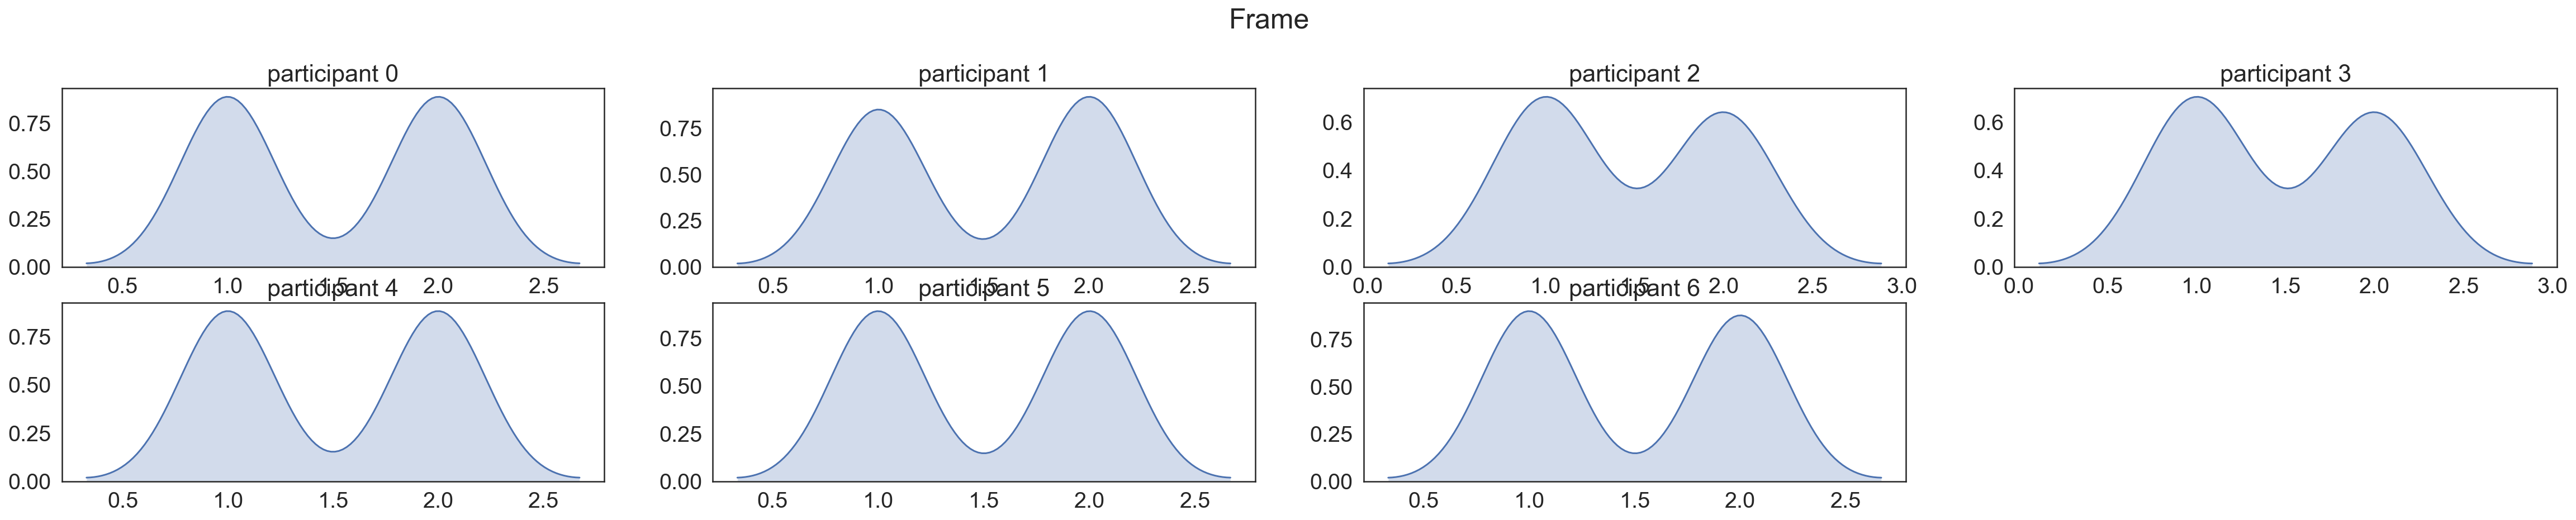

In [94]:
participant_densities(data_exp1,'Frame',title = 'Frame')

#### This plot is just to check if I am presenting a comparable number of trials for each frames (in some cases is different because participants can miss the response)

## Accuracy per participant

In [95]:
accuracies = pd.DataFrame( columns = [])

In [96]:
accuracy_like = []
accuracy_dislike = []

for i in data_exp1.Part.unique():
    accuracy_like.append(data_exp1.loc[(data_exp1['Frame'] == 1) & (data_exp1['Part'] == i)].correct.mean())
    accuracy_dislike.append(data_exp1.loc[(data_exp1['Frame'] == 2) & (data_exp1['Part'] == i)].correct.mean())

accuracies['participant'] = range(len(data_exp1.Part.unique()))
accuracies['like'] = accuracy_like
accuracies['dislike'] = accuracy_dislike

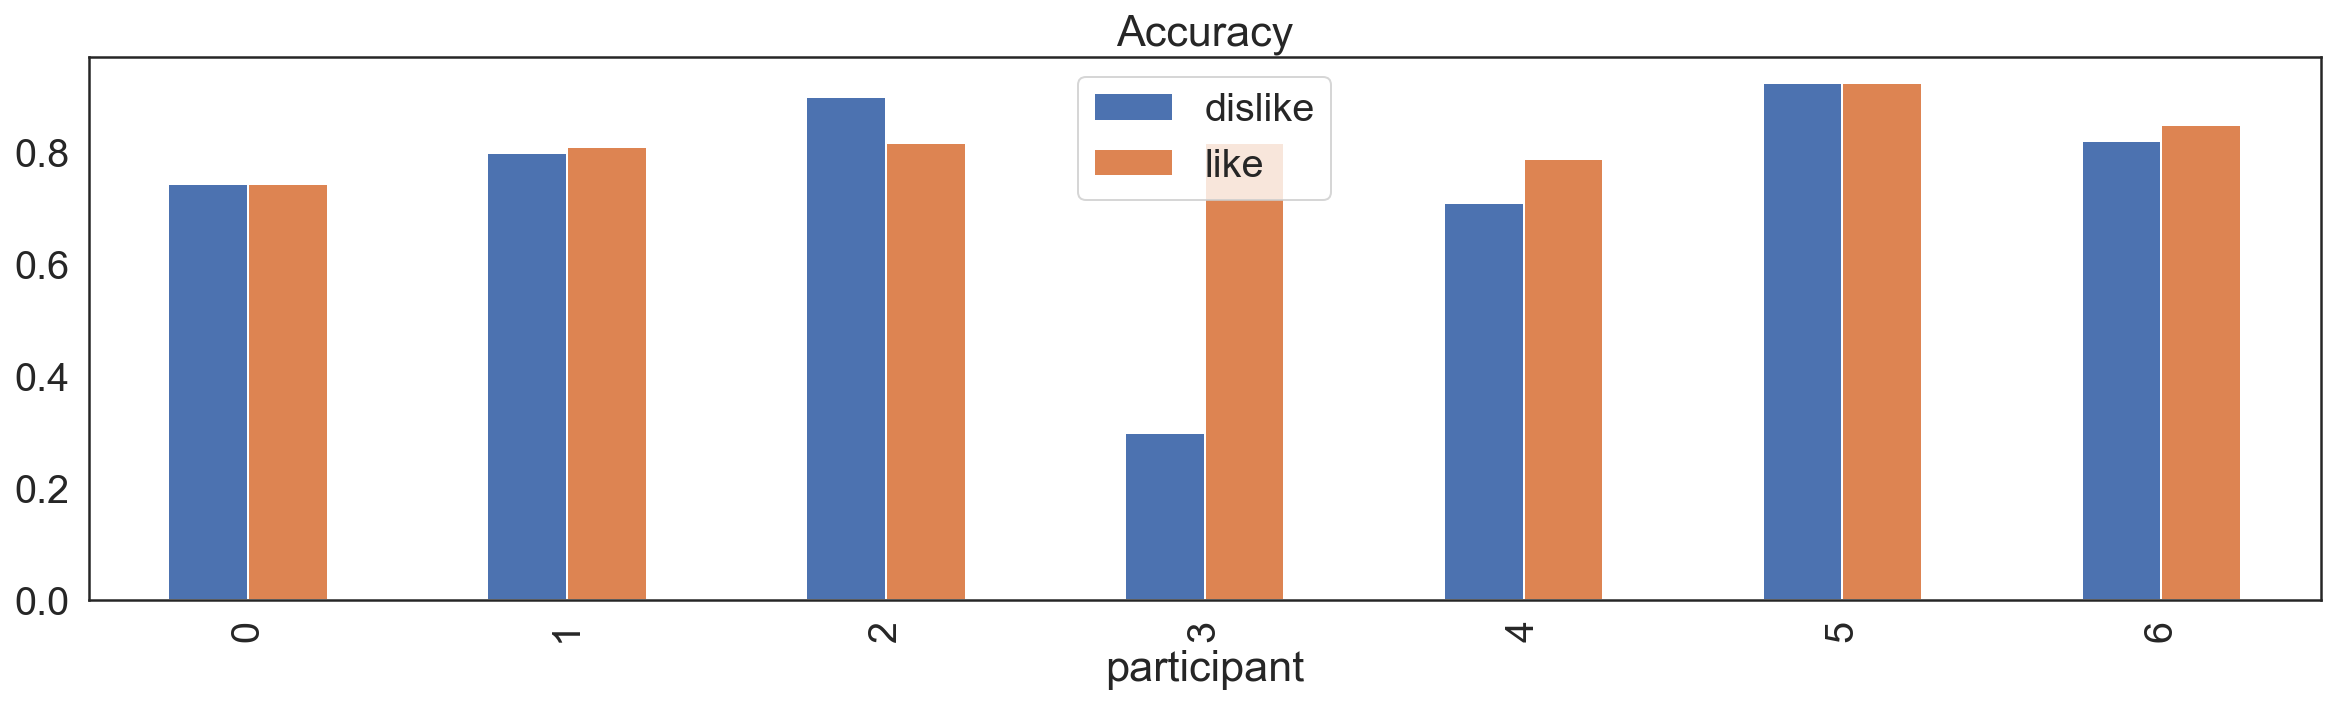

In [97]:
accuracies.plot.bar(x='participant',y={'like','dislike'}, figsize=(20,5),title = 'Accuracy')

## Split dataframe for like and dislike

In [98]:
data_expL = data_exp1.loc[(data_exp1['Frame'] == 1)] # 1 = Like, 2 = Dislike
data_expD = data_exp1.loc[(data_exp1['Frame'] == 2)] # 1 = Like, 2 = Dislike

In [99]:
#data_expL = data_exp1.loc[(data_exp1['Frame'] == 1) & (data_exp1['Part'] == 4)] # 1 = Like, 2 = Dislike
#data_expD = data_exp1.loc[(data_exp1['Frame'] == 2) & (data_exp1['Part'] == 4)] # 1 = Like, 2 = Dislike

## Relationship between RT and |DV| (using ratings given in LIKE frame)

Pearson's r = -0.264 p =  0.0


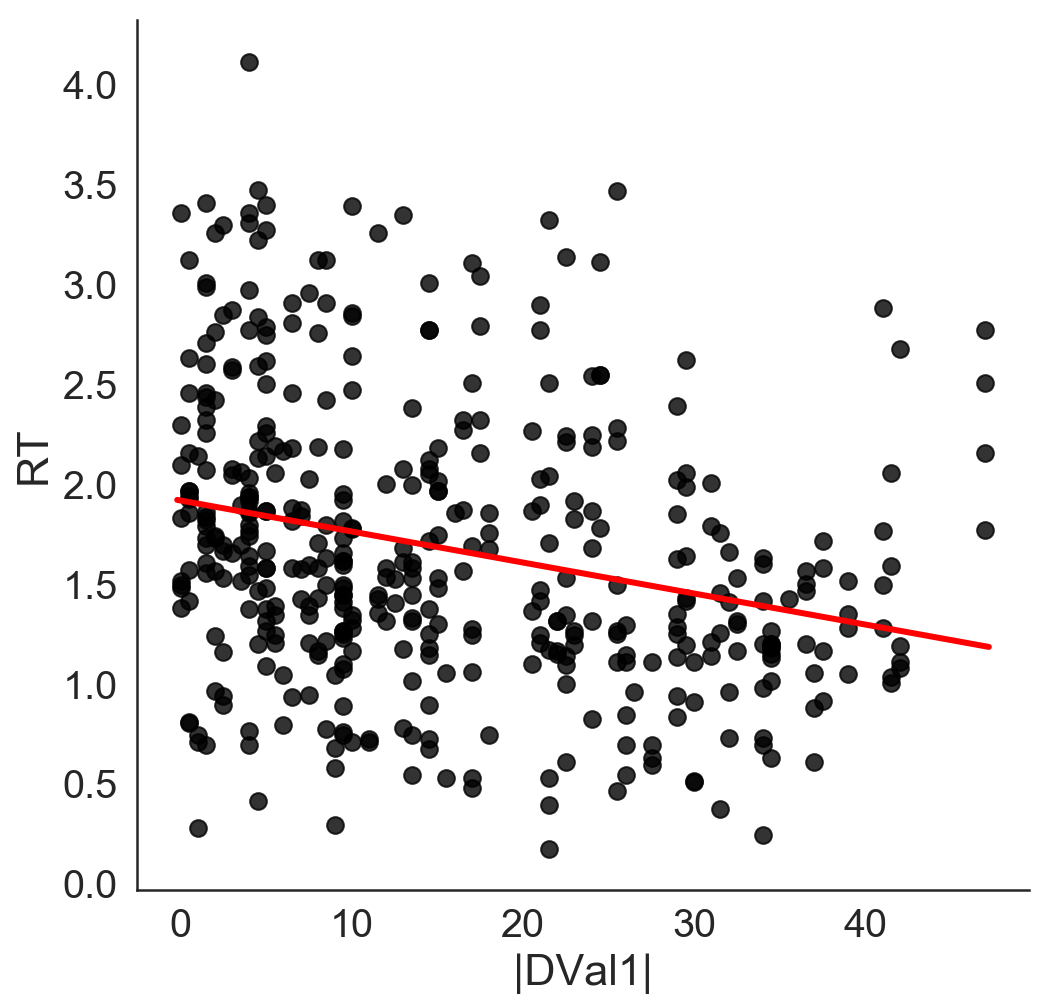

In [100]:
corrPlotSimple(data_exp1, 'absDVal1','|DVal1|','RT','RT')

## Logistic plots for choice in like and dislike frames

/Users/pradyumna/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/pradyumna/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/pradyumna/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/pradyumna/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/pradyumna/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will 

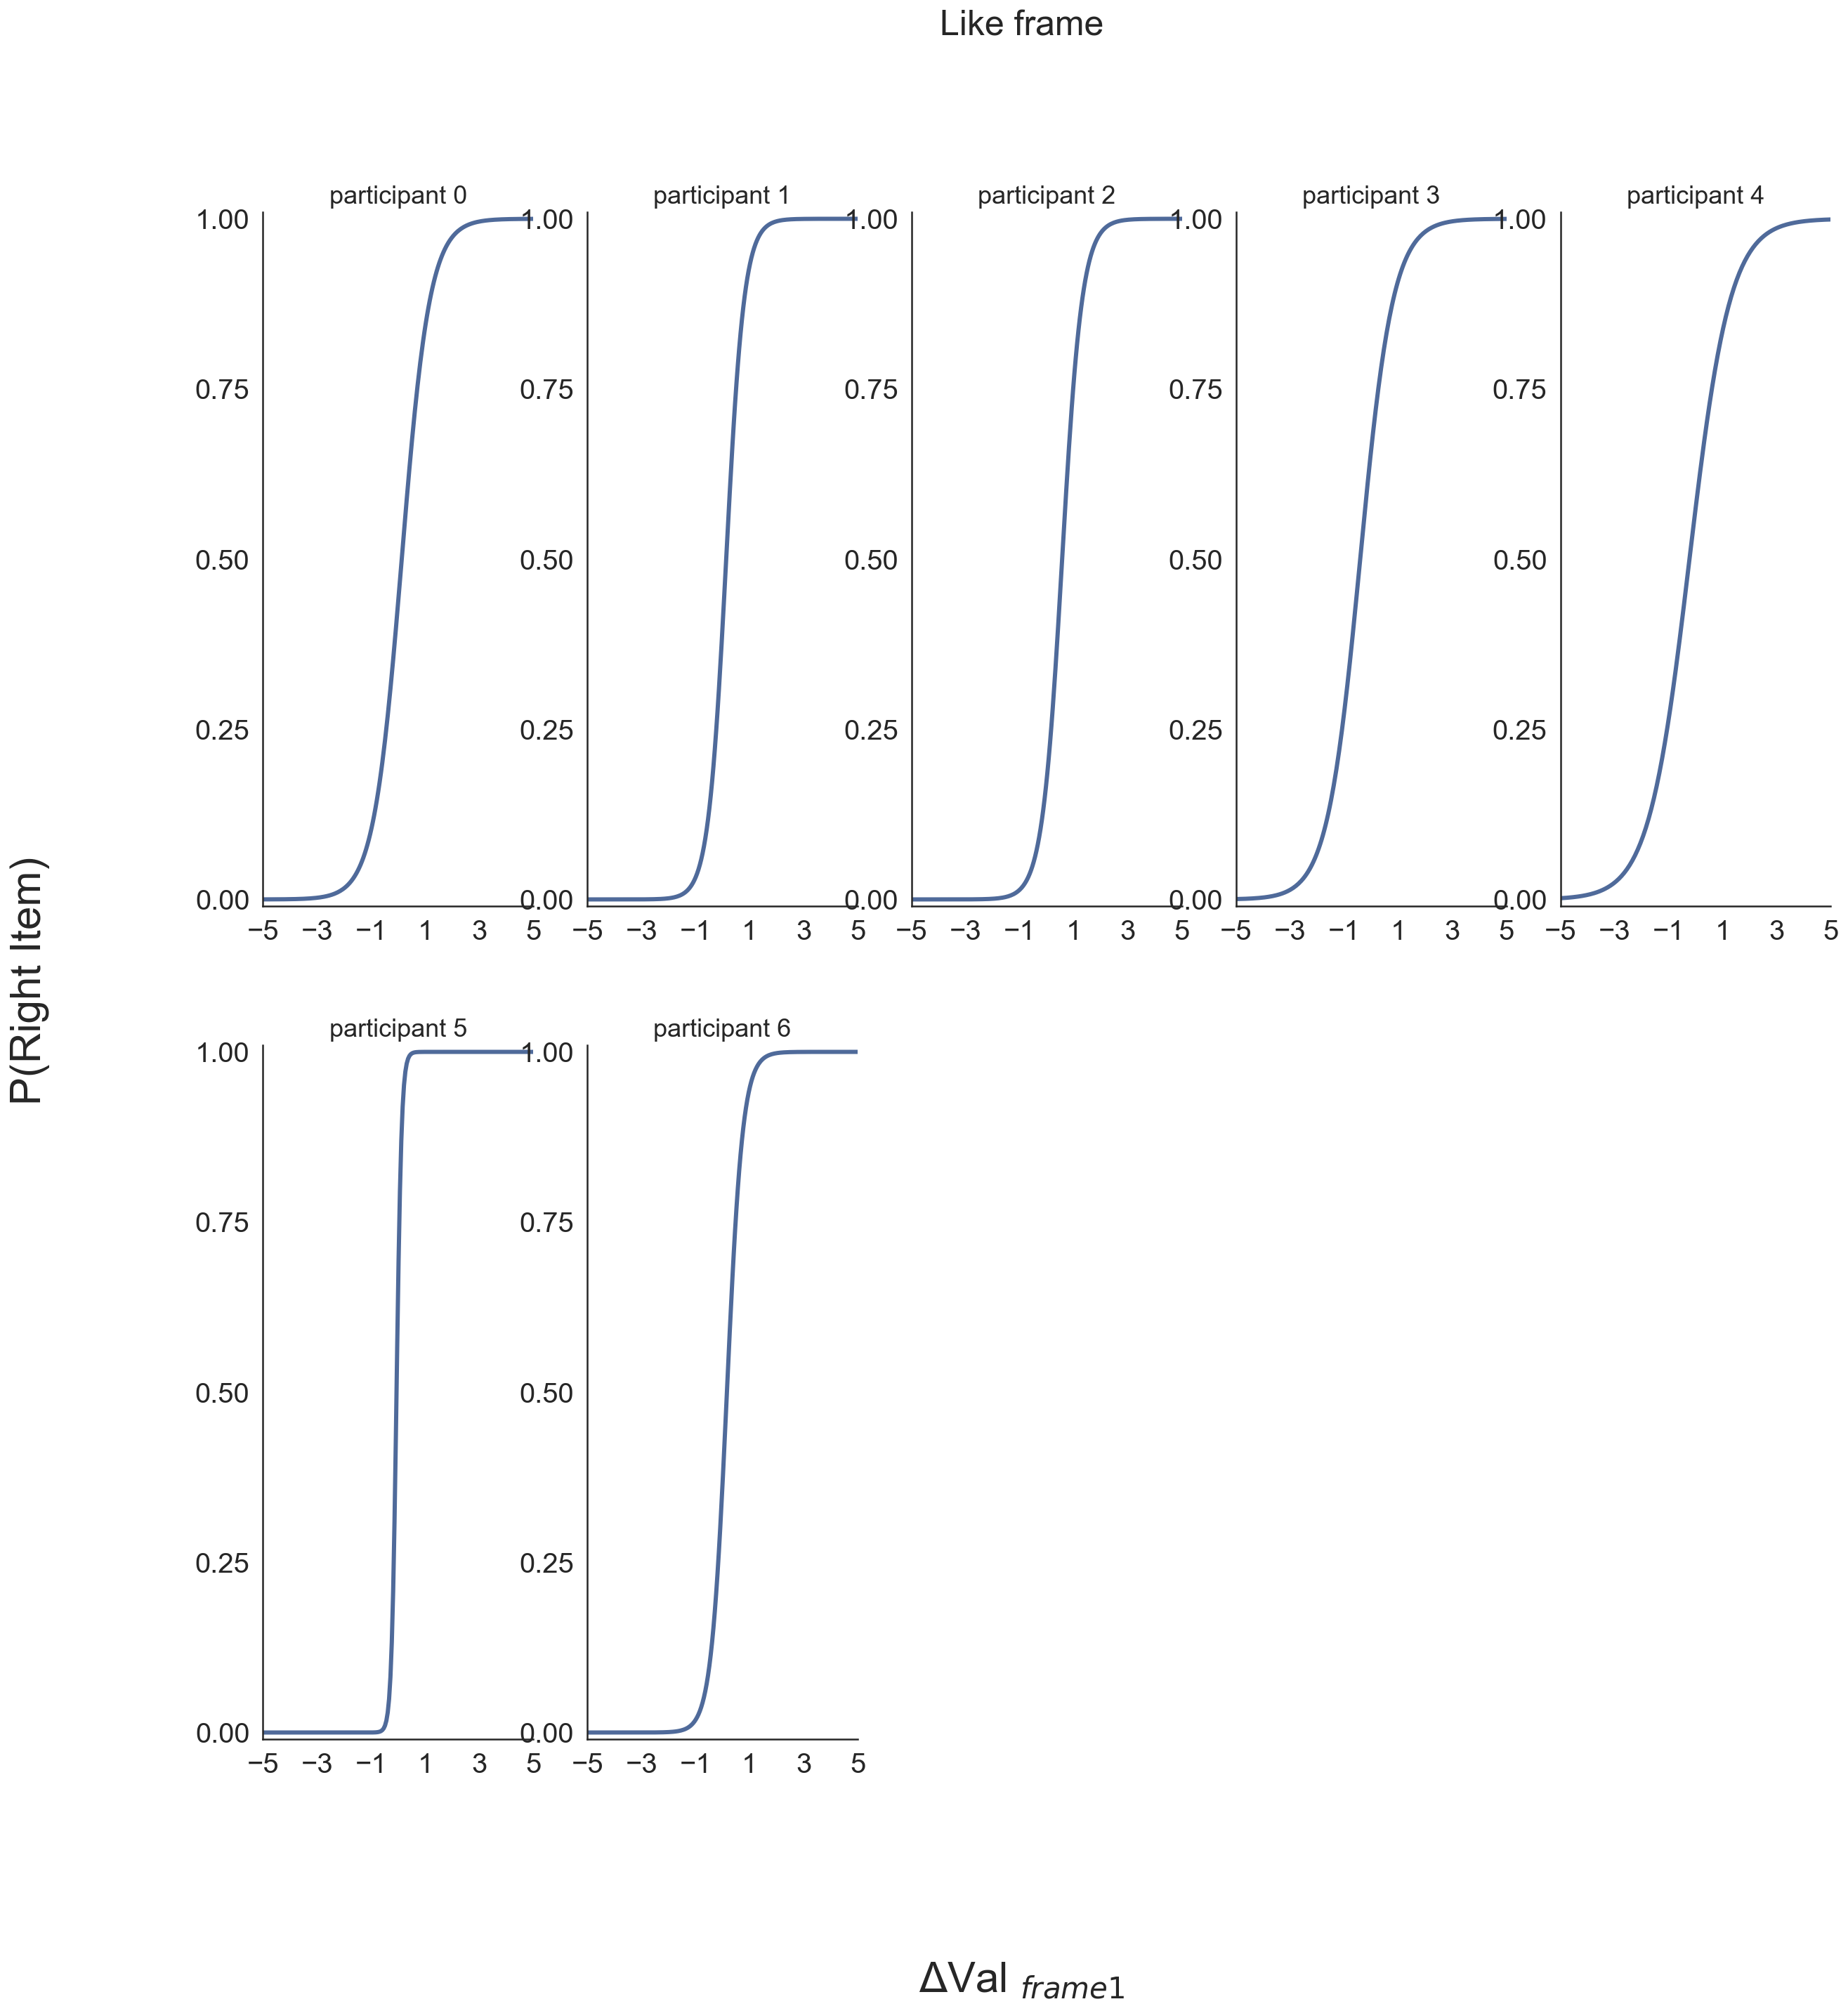

In [105]:

logisticplot_all_part( data=data_expL, xaxis='zDVal1', yaxis='choices', ylab='P(Right Item)', xlab= r'ΔVal $_{frame1}$',
                 modlowcol='#4F6A9A', title='Like frame', parvar='Part')

/Users/pradyumna/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/pradyumna/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/pradyumna/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/pradyumna/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/pradyumna/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will 

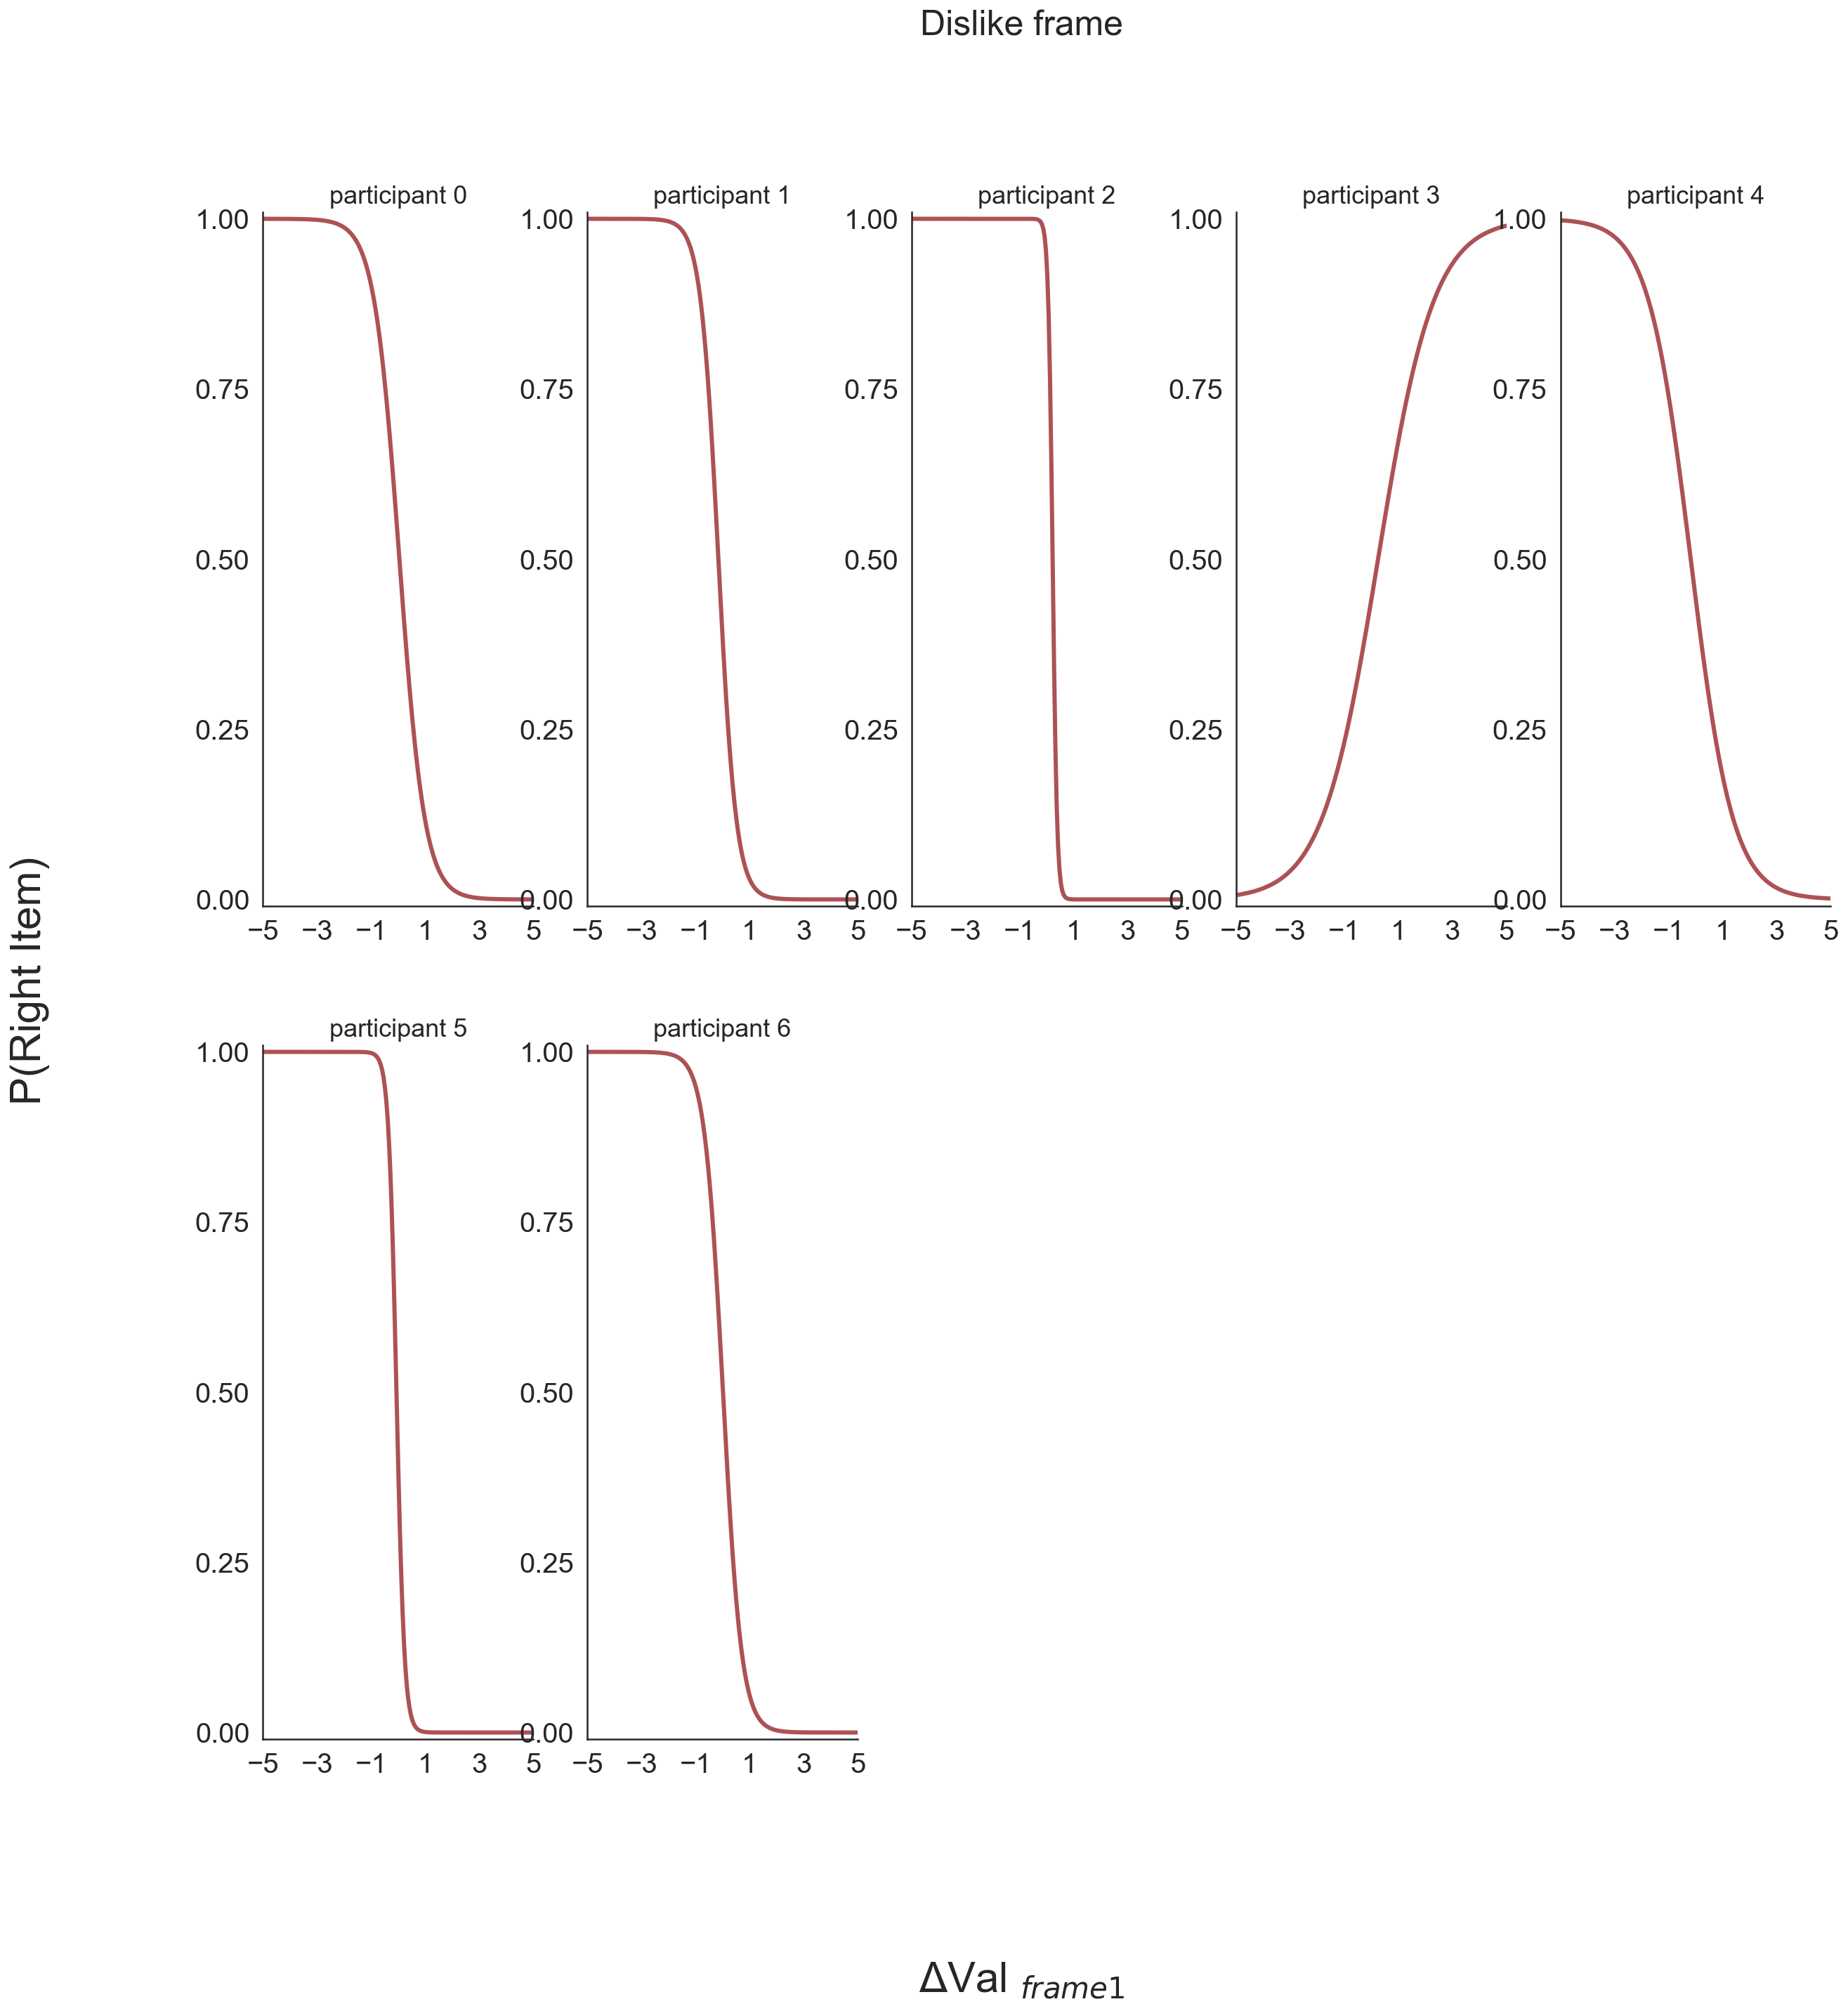

In [107]:
logisticplot_all_part( data=data_expD, xaxis='zDVal1', yaxis='choices', ylab='P(Right Item)', xlab= r'ΔVal $_{frame1}$',
                 modlowcol='#AC5255', title='Dislike frame', parvar='Part')

#### Looks like participant 3 did not responded following the change to dislike frame

## Considering logistics plots aggregating all participants

/Users/pradyumna/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


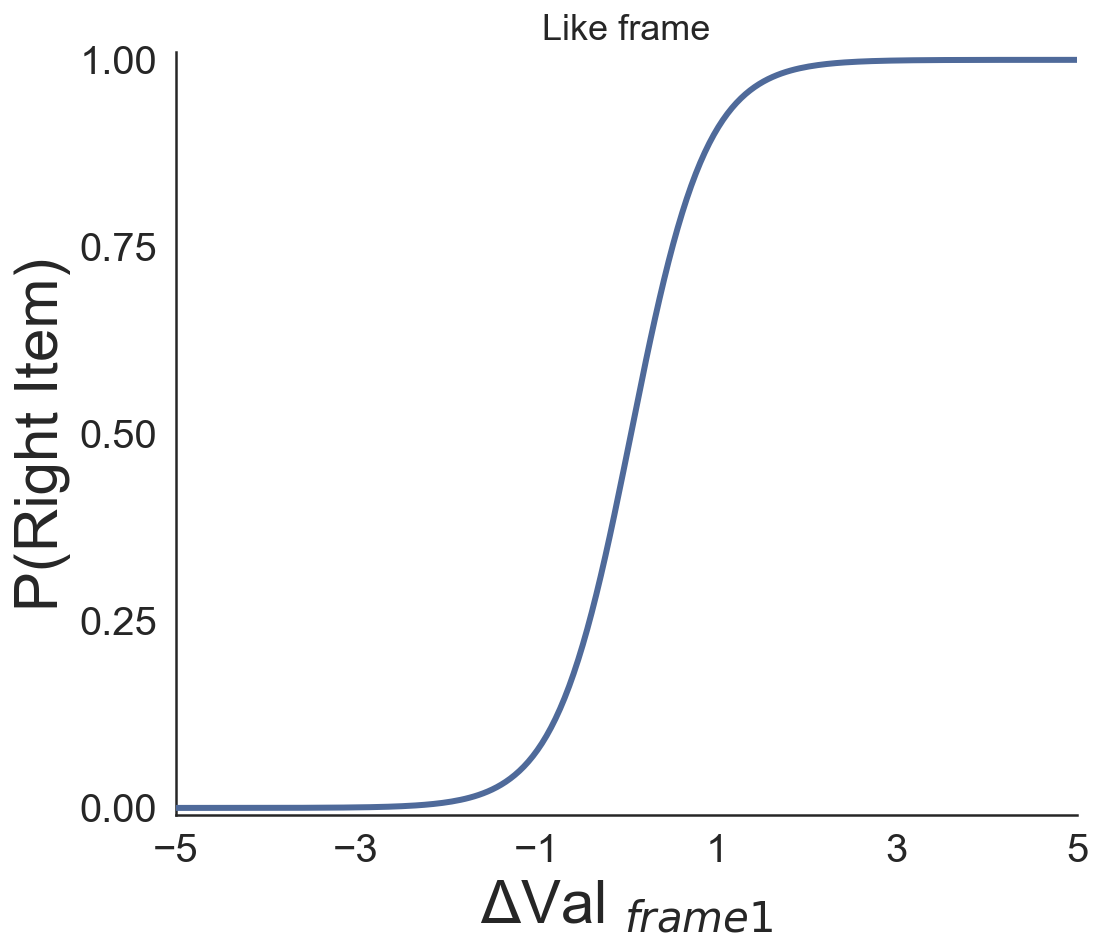

In [44]:
logisticplot_all( data=data_expL, xaxis='zDVal1', yaxis='choices', ylab='P(Right Item)', xlab= r'ΔVal $_{frame1}$',
                 modlowcol='#4F6A9A', title='Like frame', parvar='Part')
plt.tight_layout()

/Users/pradyumna/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


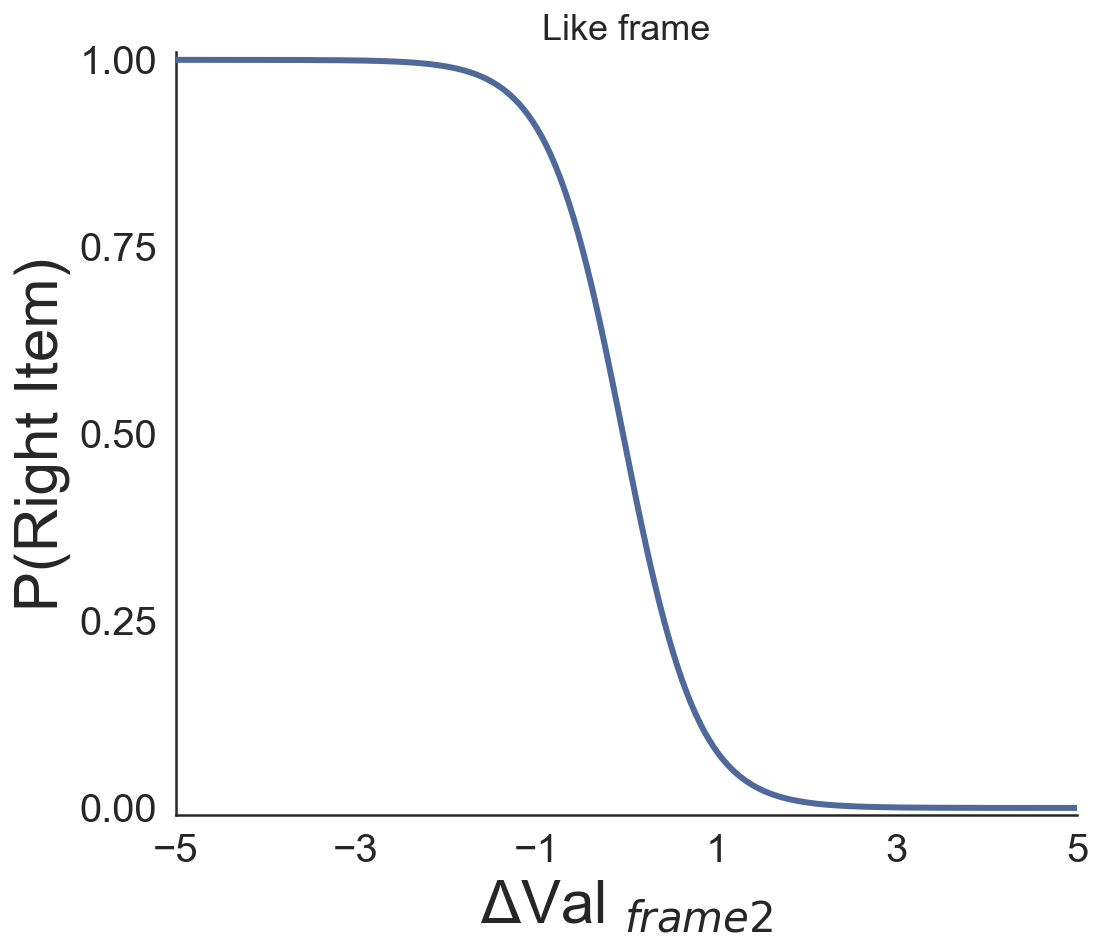

In [45]:
logisticplot_all( data=data_expL, xaxis='zDVal2', yaxis='choices', ylab='P(Right Item)', xlab= r'ΔVal $_{frame2}$',
                 modlowcol='#4F6A9A', title='Like frame', parvar='Part')
plt.tight_layout()

/Users/pradyumna/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


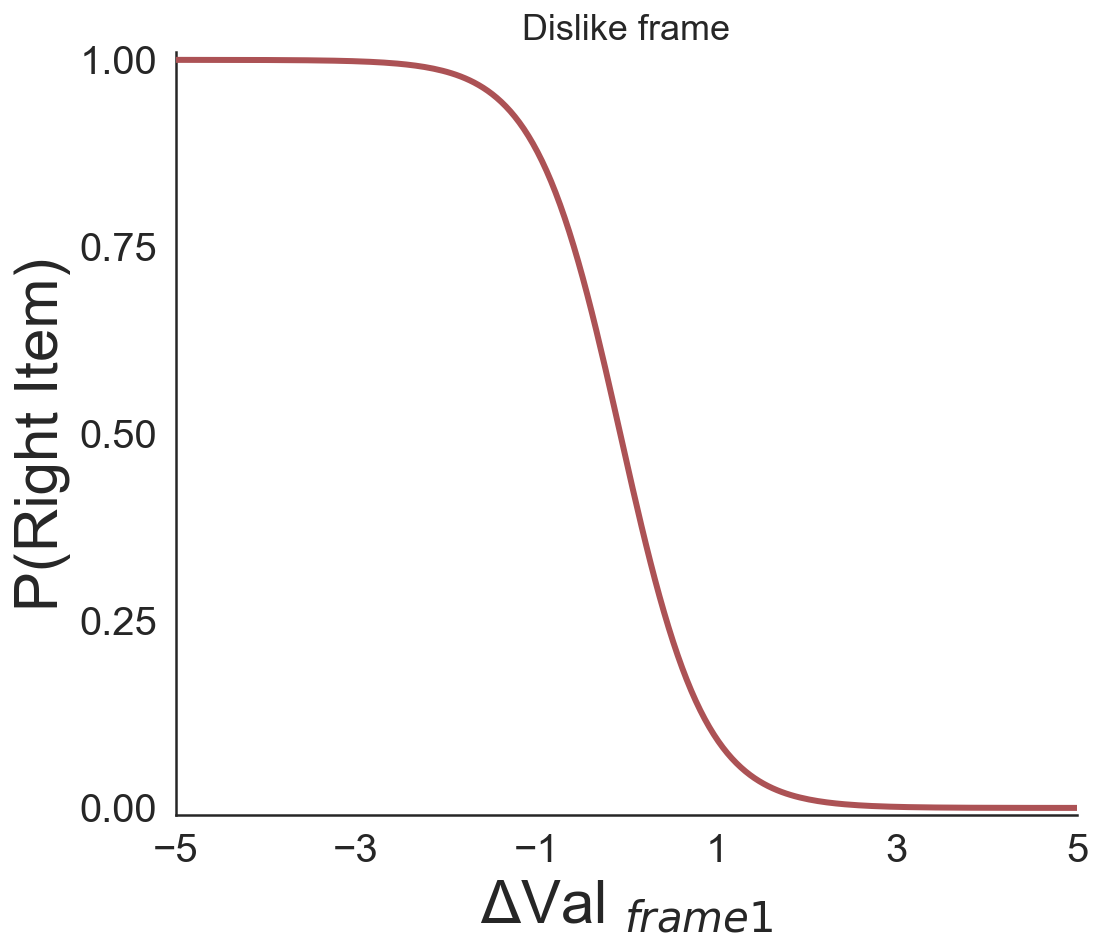

In [46]:
logisticplot_all( data=data_expD, xaxis='zDVal1', yaxis='choices', ylab='P(Right Item)', xlab= r'ΔVal $_{frame1}$',
                 modlowcol='#AC5255', title='Dislike frame', parvar='Part')
plt.tight_layout()

/Users/pradyumna/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


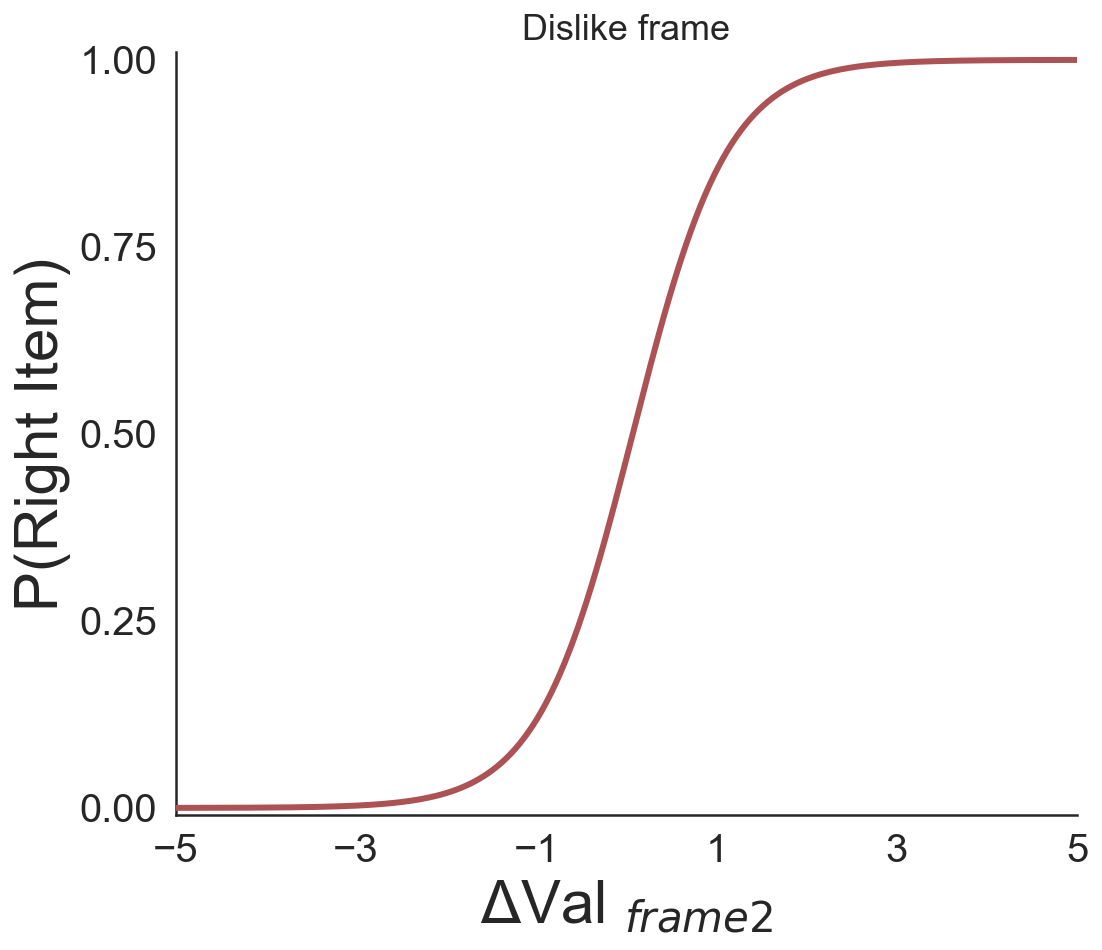

In [47]:
logisticplot_all( data=data_expD, xaxis='zDVal2', yaxis='choices', ylab='P(Right Item)', xlab= r'ΔVal $_{frame2}$',
                 modlowcol='#AC5255', title='Dislike frame', parvar='Part')
plt.tight_layout()

# (Preliminar)Regression analysis

In [48]:
%R -i data_exp1
data_exp1

/Users/pradyumna/anaconda3/lib/python3.7/site-packages/rpy2/robjects/pandas2ri.py:191: FutureWarning: from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.
  res = PandasDataFrame.from_items(items)


index  trial  leftId  rightId  Frame   endTime  choice        RT  LRat1  \
0       0    0.0    21.0      4.0    2.0  7.508409     1.0  1.174838   50.0   
1       1    1.0    12.0     14.0    2.0  7.513930     1.0  0.780269   40.5   
2       2    2.0    20.0     19.0    2.0  7.515296     1.0  1.195317   50.0   
3       3    3.0     2.0      8.0    2.0  7.514498     1.0  0.247736   44.5   
4       4    4.0     4.0     21.0    1.0  7.514311     1.0  0.178482   28.5   
5       5    5.0    12.0     20.0    1.0  7.513606    -1.0  2.181133   40.5   
6       6    6.0    24.0     21.0    2.0  7.514916     1.0  3.361822   50.0   
7       7    7.0     2.0     32.0    2.0  7.513895     1.0  2.000413   44.5   
8       8    8.0    19.0      8.0    1.0  7.514563     1.0  3.298472    8.0   
9       9    9.0    24.0     21.0    1.0  7.514475     1.0  1.482191   50.0   
10     10   10.0     7.0     24.0    2.0  7.533371    -1.0  3.472894   24.5   
11     11   11.0    19.0     20.0    2.0  7.513676    -1.0  2.680498    8.0   
12     13   13.0    11.0     13.0    1.0  7.514578    -1.0  1.246365   21.5   
13     14   14.0     2.0      8.0    1.0  7.515374    -1.0  0.698316   44.5   
14     15   15.0    25.0     14.0    1.0  7.513834     1.0  1.079885   18.0   
15     16   16.0    32.0      2.0    1.0  7.515025     1.0  0.749102   31.0   
16     17   17.0    21.0      4.0    1.0  7.514161    -1.0  0.398966   50.0   
17     18   18.0    14.0     12.0    2.0  7.514242    -1.0  2.078667   27.5   
18     19   19.0    18.0     27.0    1.0  7.514450     1.0  1.547261   50.0   
19     21   21.0    12.0     20.0    2.0  7.514755    -1.0  1.616939   40.5   
20     22   22.0     6.0      7.0    1.0  7.514262    -1.0  2.146601   25.5   
21     23   23.0    32.0      5.0    1.0  7.514405    -1.0  0.913481   31.0   
22     24   24.0    24.0      7.0    1.0  7.513696    -1.0  1.265961   50.0   
23     25   25.0     8.0      2.0    2.0  7.514479    -1.0  0.980972   10.5   
24     26   26.0    27.0     18.0    1.0  7.514286     1.0  1.595422   46.0   
25     27   27.0    20.0     12.0    2.0  7.514039    -1.0  1.414524   50.0   
26     28   28.0     4.0     21.0    2.0  7.513827    -1.0  0.532735   28.5   
27     29   29.0    18.0     25.0    1.0  7.514261    -1.0  1.414328   50.0   
28     30   30.0     7.0      6.0    1.0  7.514328    -1.0  0.748972   24.5   
29     31   31.0    32.0      2.0    2.0  7.514388     1.0  0.547924   31.0   
..    ...    ...     ...      ...    ...       ...     ...       ...    ...   
402   529   49.0    27.0     19.0    1.0  7.015333    -1.0  1.249549   34.5   
403   530   50.0     2.0     13.0    1.0  7.014345    -1.0  1.251711   46.5   
404   531   51.0    25.0     20.0    1.0  7.013936     1.0  2.551225   25.0   
405   532   52.0     4.0     21.0    1.0  7.013769     1.0  1.350460   26.0   
406   533   53.0     6.0     32.0    1.0  7.014783    -1.0  1.317274   50.0   
407   534   54.0     5.0     16.0    1.0  7.014552     1.0  1.584103    1.0   
408   535   55.0     7.0     14.0    1.0  7.014721    -1.0  1.818168   22.5   
409   536   56.0    16.0      5.0    1.0  7.013498    -1.0  1.150324    9.0   
410   537   57.0     8.0     11.0    1.0  7.013770     1.0  1.867978   19.5   
411   538   58.0    32.0      4.0    1.0  7.015546    -1.0  2.101607   26.0   
412   539   59.0    21.0      4.0    1.0  7.012876    -1.0  1.100060   48.5   
413   540   60.0     8.0     10.0    2.0  7.000861    -1.0  1.583847   19.5   
414   541   61.0    32.0      4.0    2.0  7.013967    -1.0  1.834718   26.0   
415   542   62.0     6.0     24.0    2.0  7.014224     1.0  1.901206   50.0   
416   543   63.0    27.0     20.0    2.0  7.013625    -1.0  2.017069   34.5   
417   544   64.0    19.0     27.0    2.0  7.014782    -1.0  1.267618   11.5   
418   545   65.0    11.0      8.0    2.0  7.013859    -1.0  1.584645   24.5   
419   546   66.0     7.0     25.0    2.0  7.013953     1.0  1.700288   22.5   
420   547   67.0    32.0      6.0    2.0  7.014333    

In [49]:
%%R
# Separating the data for both conditions 
data_exp1_Like <- data_exp1[ which(data_exp1$Frame=='1'), ]
data_exp1_DisLike <- data_exp1[ which(data_exp1$Frame=='2'), ]

[1] "Like BIC:"
[1] 191.1733
[1] "DisLike BIC:"
[1] 204.9681


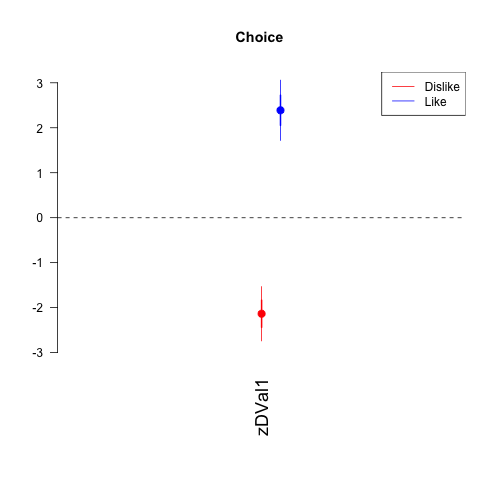

In [50]:
%%R
title_plot = "Choice "

ModelChoiceL_1 <- glm(choices ~ zDVal1 , data=data_exp1_Like, family=binomial(link="logit"))
ModelChoiceD_1 <- glm(choices ~ zDVal1 , data=data_exp1_DisLike, family=binomial(link="logit"))

BIC1 = BIC(ModelChoiceL_1)
BIC2 = BIC(ModelChoiceD_1)
print("Like BIC:")
print(BIC1)
print("DisLike BIC:")
print(BIC2)

coefplot(ModelChoiceD_1,intercept=FALSE,vertical = FALSE,  col.pts="red", cex.var=1.5, cex.pts=2, mar = c(8,4,5,1) ,ylim=c(-3, 3) ,main=title_plot)
coefplot(ModelChoiceL_1, intercept=FALSE, vertical = FALSE, add=TRUE, col.pts="blue", cex.var=1.5, cex.pts=2,mar = c(8,4,5,1))
legend("topright",  legend=c("Dislike", "Like"),col=c("red", "blue"), lty=1:1, cex=1)

[1] "Like BIC:"
[1] 184.0964
[1] "DisLike BIC:"
[1] 211.6211


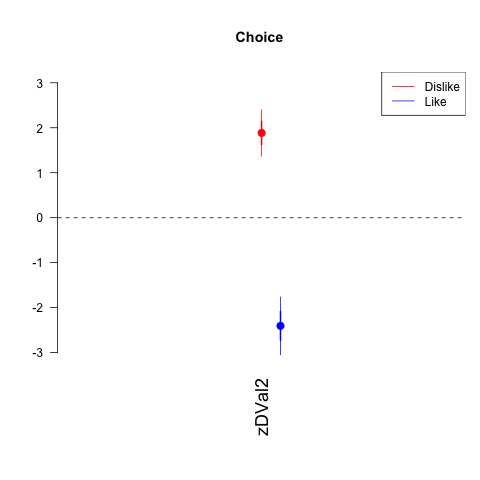

In [51]:
%%R
title_plot = "Choice "

ModelChoiceL_1 <- glm(choices ~ zDVal2 , data=data_exp1_Like, family=binomial(link="logit"))
ModelChoiceD_1 <- glm(choices ~ zDVal2 , data=data_exp1_DisLike, family=binomial(link="logit"))

BIC1 = BIC(ModelChoiceL_1)
BIC2 = BIC(ModelChoiceD_1)
print("Like BIC:")
print(BIC1)
print("DisLike BIC:")
print(BIC2)

coefplot(ModelChoiceD_1,intercept=FALSE,vertical = FALSE,  col.pts="red", cex.var=1.5, cex.pts=2, mar = c(8,4,5,1) ,ylim=c(-3, 3) ,main=title_plot)
coefplot(ModelChoiceL_1, intercept=FALSE, vertical = FALSE, add=TRUE, col.pts="blue", cex.var=1.5, cex.pts=2,mar = c(8,4,5,1))
legend("topright",  legend=c("Dislike", "Like"),col=c("red", "blue"), lty=1:1, cex=1)

#### As expected, we observe that the rating given in dislike frame (Frame 2) accounts for the most disliked option, therefore, it predicts the choice maintaing the sign.

[1] "Like BIC:"
[1] 191.4776
[1] "DisLike BIC:"
[1] 210.2564


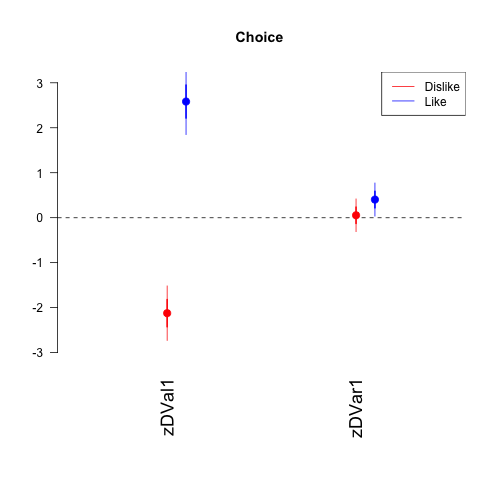

In [52]:
%%R
title_plot = "Choice "

ModelChoiceL_1 <- glm(choices ~ zDVal1 + zDVar1  , data=data_exp1_Like, family=binomial(link="logit"))
ModelChoiceD_1 <- glm(choices ~ zDVal1 + zDVar1  , data=data_exp1_DisLike, family=binomial(link="logit"))

BIC1 = BIC(ModelChoiceL_1)
BIC2 = BIC(ModelChoiceD_1)
print("Like BIC:")
print(BIC1)
print("DisLike BIC:")
print(BIC2)

coefplot(ModelChoiceD_1,intercept=FALSE,vertical = FALSE,  col.pts="red", cex.var=1.5, cex.pts=2, mar = c(8,4,5,1) ,ylim=c(-3, 3) ,main=title_plot)
coefplot(ModelChoiceL_1, intercept=FALSE, vertical = FALSE, add=TRUE, col.pts="blue", cex.var=1.5, cex.pts=2,mar = c(8,4,5,1))
legend("topright",  legend=c("Dislike", "Like"),col=c("red", "blue"), lty=1:1, cex=1)

[1] "Like BIC:"
[1] 188.6192
[1] "DisLike BIC:"
[1] 216.9961


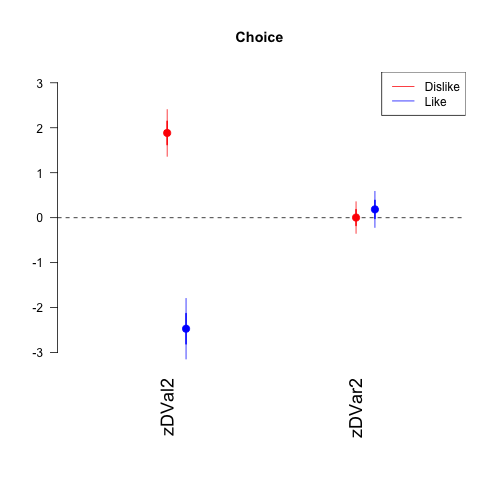

In [53]:
%%R
title_plot = "Choice "

ModelChoiceL_1 <- glm(choices ~ zDVal2 + zDVar2  , data=data_exp1_Like, family=binomial(link="logit"))
ModelChoiceD_1 <- glm(choices ~ zDVal2 + zDVar2  , data=data_exp1_DisLike, family=binomial(link="logit"))

BIC1 = BIC(ModelChoiceL_1)
BIC2 = BIC(ModelChoiceD_1)
print("Like BIC:")
print(BIC1)
print("DisLike BIC:")
print(BIC2)

coefplot(ModelChoiceD_1,intercept=FALSE,vertical = FALSE,  col.pts="red", cex.var=1.5, cex.pts=2, mar = c(8,4,5,1) ,ylim=c(-3, 3) ,main=title_plot)
coefplot(ModelChoiceL_1, intercept=FALSE, vertical = FALSE, add=TRUE, col.pts="blue", cex.var=1.5, cex.pts=2,mar = c(8,4,5,1))
legend("topright",  legend=c("Dislike", "Like"),col=c("red", "blue"), lty=1:1, cex=1)

#### the difference in variability between items seems to not influence choice

## Since I don't have confidence I try to predict RT

[1] "Like BIC:"
[1] 599.7247
[1] "DisLike BIC:"
[1] 627.8147


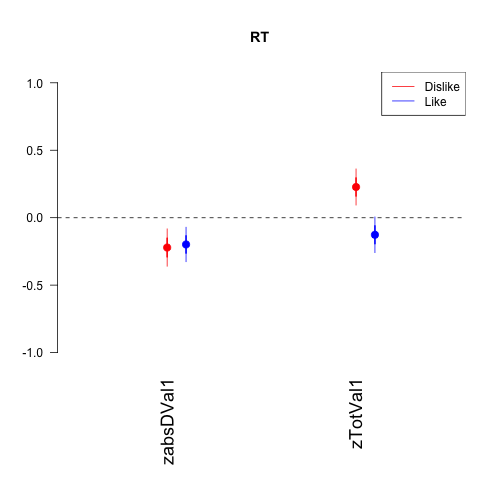

In [54]:
%%R
title_plot = "RT "

ModelChoiceL_1 <- glm(zRT ~ zabsDVal1 + zTotVal1  , data=data_exp1_Like, )
ModelChoiceD_1 <- glm(zRT ~ zabsDVal1 + zTotVal1  , data=data_exp1_DisLike, )

BIC1 = BIC(ModelChoiceL_1)
BIC2 = BIC(ModelChoiceD_1)
print("Like BIC:")
print(BIC1)
print("DisLike BIC:")
print(BIC2)

coefplot(ModelChoiceD_1,intercept=FALSE,vertical = FALSE,  col.pts="red", cex.var=1.5, cex.pts=2, mar = c(8,4,5,1) ,ylim=c(-1, 1) ,main=title_plot)
coefplot(ModelChoiceL_1, intercept=FALSE, vertical = FALSE, add=TRUE, col.pts="blue", cex.var=1.5, cex.pts=2,mar = c(8,4,5,1))
legend("topright",  legend=c("Dislike", "Like"),col=c("red", "blue"), lty=1:1, cex=1)

[1] "Like BIC:"
[1] 603.3229
[1] "DisLike BIC:"
[1] 623.5147


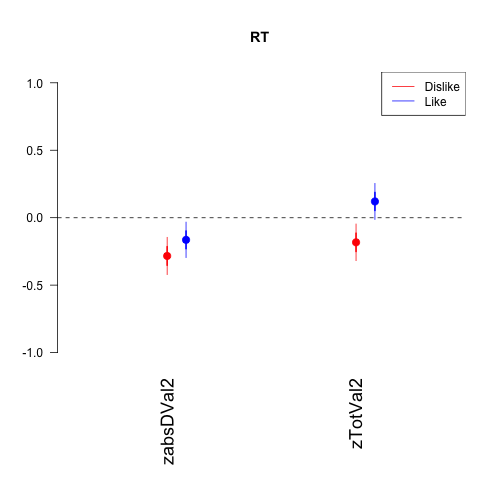

In [54]:
%%R
title_plot = "RT "

ModelChoiceL_1 <- glm(zRT ~ zabsDVal2 + zTotVal2  , data=data_exp1_Like, )
ModelChoiceD_1 <- glm(zRT ~ zabsDVal2 + zTotVal2  , data=data_exp1_DisLike, )

BIC1 = BIC(ModelChoiceL_1)
BIC2 = BIC(ModelChoiceD_1)
print("Like BIC:")
print(BIC1)
print("DisLike BIC:")
print(BIC2)

coefplot(ModelChoiceD_1,intercept=FALSE,vertical = FALSE,  col.pts="red", cex.var=1.5, cex.pts=2, mar = c(8,4,5,1) ,ylim=c(-1, 1) ,main=title_plot)
coefplot(ModelChoiceL_1, intercept=FALSE, vertical = FALSE, add=TRUE, col.pts="blue", cex.var=1.5, cex.pts=2,mar = c(8,4,5,1))
legend("topright",  legend=c("Dislike", "Like"),col=c("red", "blue"), lty=1:1, cex=1)

#### Interesting how we observe a flip for total value, using RT as a proxy for confidence (i.e. if I'm more confident I have lower reaction time. In like frame, if I have higher TotVal, I have lower RT --> high confidence; but in dislike, higher TotVal means higher RT --> lower confidence)  

-----------------------------------------------------

# Import toolboxes and functions

In [55]:
import numpy as np
import pandas as pd
from pandas.core.frame import DataFrame as DF

import seaborn as sns
sns.set(color_codes=True)
#np.random.seed(sum(map(ord, "distributions")))
from sklearn import linear_model  # packages for the logistic regression function to plot the logistic regression 
from sklearn.linear_model import LogisticRegression # packages for the logistic regression function to plot the logistic regression 
import scipy
from scipy import stats, integrate
from scipy.stats import mode
from scipy.stats.stats import pearsonr # Pearson's correlation
from copy import copy as copy
import operator as operator
import pylab

# Plotting tools
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.patches as mpatches
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
%pylab inline
figsize(5, 5)

import glob

import os
# Added to avoid OMP:error#15
os.environ['KMP_DUPLICATE_LIB_OK']='True'

Populating the interactive namespace from numpy and matplotlib


/Users/pradyumna/anaconda3/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['copy', 'pylab']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [56]:
def logisticplot_all (data, xaxis='zDV', yaxis='G_choice', ylab='P(Chose Reference Item)', xlab='DV (Z-score)',
                 modlowcol='#AAAAAA', title='empty', parvar='SubNo'):
    
    sns.set(font_scale=1.5, style='white')
    fig = figure(figsize=(8,7))
    fig.set_facecolor('white')
    
    # defining the sigmoid function
    def model(x):
        y = 1 / (1 + np.exp(-x))
        return y
    
    sub = plt.subplot()

    #run the classifier
    clf = linear_model.LogisticRegression(C=1e5)

    logit_all = {}

    # I think this defines the problem space
    X_test = np.linspace(-5,10,300)

   #fitting the predictive logistic model for all the trials, for a participant specified by x
            # first I specify the value difference right - left, then I specify the choices, left or right
    clf.fit(data[xaxis][:, np.newaxis],
            data[yaxis])
    logit_all = model(X_test * clf.coef_ + clf.intercept_).ravel()

    #print ('Part: ',x ,' High measure:logit coef =',clf.coef_, '; Intercept: ', clf.intercept_)
    
    all_coef = clf.coef_
    all_intercept = clf.intercept_
    
    #Plotting the predictive lines
    line_all = sub.plot(X_test, logit_all, color=modlowcol, linewidth=3, zorder=5,linestyle='-')

   # #Plotting the binned data
   # data['DVBin2'] = data.groupby(parvar).apply(parsplit, input=xaxis, quantiles=4).values
    
   # # determine the x coordinates
   # x_cords= data.groupby('DVBin2')[xaxis].mean()
    
   # # determine low y coordinates
   # y_cords_low = data.loc[(data[moderator]==0), :].groupby('DVBin2')[yaxis].mean().values
    
   # # determine low y standard errors
   # test = pd.DataFrame(data.loc[(data[moderator]==0), :].groupby(['DVBin2', parvar])[yaxis].mean()).reset_index()
   # y_low_error = test.groupby('DVBin2')[yaxis].std()/np.sqrt(len(test[parvar].unique()))
    
    
   # # determine high y coordinates
   # y_cords_high = data.loc[(data[moderator]==1), :].groupby('DVBin2')[yaxis].mean().values
    
   # # determine high y standard errors
   # test2 = pd.DataFrame(data.loc[data[moderator]==1, :].groupby(['DVBin2', parvar])[yaxis].mean()).reset_index()
   # y_high_error = test2.groupby('DVBin2')[yaxis].std()/np.sqrt(len(test[parvar].unique()))
    
   # # plot the low points
   # plt.scatter(x_cords, y_cords_low, c=modlowcol, marker='D', s=60, zorder=1)
   # # plot low error bars
   # plt.errorbar(x_cords, y_cords_low, yerr=y_low_error, fmt='o', zorder=3, c=modlowcol)
    
   # # plot the high points
   # plt.scatter(x_cords, y_cords_high, c=modhighcol, marker='o', s=60, zorder=2)
   # # plot high error bars
   # plt.errorbar(x_cords, y_cords_high, yerr=y_high_error, fmt='o', zorder=4, c=modhighcol)
    
    
    # Set Labels
    sub.set_ylabel(ylab, fontsize=25)
    sub.set_xlabel(xlab, fontsize=25)

    # Set Ticks
    sub.set_xticks((-5,-3,-1,1,3,5))
    sub.set_yticks((0,0.25,0.5,0.75,1))
    sub.tick_params(axis='both', which='major', labelsize=20)

    # Set Limits
    sub.set_ylim(-0.01, 1.01)
    sub.set_xlim(-5, 5)

    # Set Title
    if title == 'empty':
        sub.set_title('')
    else:
        sub.set_title(title)
    
    #sub.legend(loc=0, prop={'size':20})
    sns.despine()

In [104]:
def logisticplot_all_part (data, xaxis='zDV', yaxis='G_choice', ylab='P(Chose Reference Item)', xlab='DV (Z-score)',
                 modlowcol='#AAAAAA', title='empty', parvar='SubNo'):
    
    fig = figure(figsize=(20,20))
    fig.set_facecolor('white')
    
    
    # Counter to know where to plot the particpant
    order = 1
    # Initialize the array to store coefs
 
    # a list of all the participants in the dataset
    participants = data.loc[:, 'Part'].unique()

    
    for x in participants:

            sub={}
            sub['%s' % x] = plt.subplot(int(len(participants)/5+1), 5, order)

            data_in = data.loc[data['Part'] == x]
            sns.set(font_scale=1.5, style='white')
            
            # defining the sigmoid function
            def model(x):
                y = 1 / (1 + np.exp(-x))
                return y

            sub['%s' % x].set_title('participant %s' % x)


            #run the classifier
            clf = linear_model.LogisticRegression(C=1e5)

            logit_all = {}

            # I think this defines the problem space
            X_test = np.linspace(-5,10,300)

           #fitting the predictive logistic model for all the trials, for a participant specified by x
                    # first I specify the value difference right - left, then I specify the choices, left or right
            clf.fit(data_in[xaxis][:, np.newaxis],
                    data_in[yaxis])
            logit_all = model(X_test * clf.coef_ + clf.intercept_).ravel()

            #print ('Part: ',x ,' High measure:logit coef =',clf.coef_, '; Intercept: ', clf.intercept_)

            all_coef = clf.coef_
            all_intercept = clf.intercept_

            #Plotting the predictive lines
            line_all = sub['%s' % x].plot(X_test, logit_all, color=modlowcol, linewidth=3, linestyle='-')
            #line_all = sub['%s' % x].plot(X_test, logit_all, color="#000000", linewidth=3, label=modlow, zorder=5,linestyle='--')

           # #Plotting the binned data
           # data['DVBin2'] = data.groupby(parvar).apply(parsplit, input=xaxis, quantiles=4).values

           # # determine the x coordinates
           # x_cords= data.groupby('DVBin2')[xaxis].mean()

           # # determine low y coordinates
           # y_cords_low = data.loc[(data[moderator]==0), :].groupby('DVBin2')[yaxis].mean().values

           # # determine low y standard errors
           # test = pd.DataFrame(data.loc[(data[moderator]==0), :].groupby(['DVBin2', parvar])[yaxis].mean()).reset_index()
           # y_low_error = test.groupby('DVBin2')[yaxis].std()/np.sqrt(len(test[parvar].unique()))

    
           # # determine high y coordinates
           # y_cords_high = data.loc[(data[moderator]==1), :].groupby('DVBin2')[yaxis].mean().values

           # # determine high y standard errors
           # test2 = pd.DataFrame(data.loc[data[moderator]==1, :].groupby(['DVBin2', parvar])[yaxis].mean()).reset_index()
           # y_high_error = test2.groupby('DVBin2')[yaxis].std()/np.sqrt(len(test[parvar].unique()))

           # # plot the low points
           # plt.scatter(x_cords, y_cords_low, c=modlowcol, marker='D', s=60, zorder=1)
           # # plot low error bars
           # plt.errorbar(x_cords, y_cords_low, yerr=y_low_error, fmt='o', zorder=3, c=modlowcol)

           # # plot the high points
           # plt.scatter(x_cords, y_cords_high, c=modhighcol, marker='o', s=60, zorder=2)
           # # plot high error bars
           # plt.errorbar(x_cords, y_cords_high, yerr=y_high_error, fmt='o', zorder=4, c=modhighcol)

    
            # Set Labels
            #sub['%s' % x].set_ylabel(ylab, fontsize=30)
           # sub['%s' % x].set_xlabel(xlab, fontsize=30)

            # Set Ticks
            sub['%s' % x].set_xticks((-5,-3,-1,1,3,5))
            sub['%s' % x].set_yticks((0,0.25,0.5,0.75,1))
            sub['%s' % x].tick_params(axis='both', which='major', labelsize=20)

            # Set Limits
            sub['%s' % x].set_ylim(-0.01, 1.01)
            sub['%s' % x].set_xlim(-5, 5)
            order += 1


    fig.text(0.5, 0.0, xlab, fontsize= 30, ha='center')
    fig.text(0.0, 0.5, ylab,fontsize= 30, va='center', rotation='vertical')
    
    #sub.legend(loc=0, prop={'size':20})
    fig.suptitle(title, fontsize = 25)

    
    sns.despine()

In [58]:
def z_score1(data_all, part_def,z_score_var):
    z_matrix=[]
    z_matrix_aux=[]

    for i in (data_all[part_def].unique()):
        Choicedata = data_all.loc[data_all[part_def] == i]    
    
        pX_A= pd.to_numeric(Choicedata[z_score_var]) 
        pX_zA= (pX_A - np.mean(pX_A))/np.std(pX_A)

        z_matrix_aux= pX_zA.values
    
        for  j in range(len(z_matrix_aux)):    
            z_matrix.append(z_matrix_aux[j])
    return z_matrix

In [59]:
def participant_densities(data, var, xlim=(0,100), rug=True, title = ''):
    # a counter that tells us where a given participant's data should be plotted
    order = 1

    # a list of all the participants in the dataset
    participants = data.loc[:, 'Part'].unique()

    # defining the figure size
    sns.set_style('white')
    fig = figure(figsize=(40,10))

    for x in participants:
        # defining the sub figures
            sub={}
            sub['%s' % x] = plt.subplot(len(participants)/2, 4, order)
            sns.kdeplot(data.loc[data['Part'] == x, var].values, ax = sub['%s' % x], shade=True)
            #if rug==True:
            #    sns.rugplot(data.loc[data['Part'] == x, var].values, ax = sub['%s' % x])
            sub['%s' % x].set_title('participant %s' % x)
            #sub['%s' % x].set_xlim(xlim)
            order += 1
    fig.suptitle(title, fontsize = 25)


In [60]:
def corrPlotSimple(data_exp1, x_variable,x_varlabel,y_variable,y_varlabel):

    f = plt.figure(figsize=(8, 8))
    sns.set(style='white', font_scale=1.8)
    ax = sns.regplot(data=data_exp1, x= x_variable, y=y_variable, fit_reg=False, ci=0, color='#000000', scatter_kws={'s':70})
    ax.set(ylabel=y_varlabel, xlabel=x_varlabel)
    x=data_exp1[x_variable]
    y=data_exp1[y_variable]
    fit = np.polyfit(x, y, deg=1)
    future = np.arange(min(x)-0.2, max(x)+0.2, 0.01)
    fit_fn = np.poly1d(fit)
    future_fit = np.polyval(fit_fn, future)
    ax.plot(future, future_fit, color='Red', lw=3)
    sns.despine()
    
    results = pearsonr(data_exp1[x_variable], data_exp1[y_variable])
    print ("Pearson's r = {0}".format(np.round(results[0], 3)), "p = ", np.round(results[1], 3))

In [61]:
import rpy2

%load_ext rpy2.ipython
# Set up interface with R
# Make it easy to set and find values in a multi-index DF
idx = pd.IndexSlice
# Set up interface with R
%config InlineBackend.figure_format = 'retina'
import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore", category=RRuntimeWarning)


The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [62]:
%%R
library(lme4)
#library(car)
library(optimx)
library(ggplot2)
library(MASS)
library(broom)
library(dplyr)
library(reshape2)
library(arm)
library(multcomp)
library(pbkrtest)